In [47]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_13'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath

In [3]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [4]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [5]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [6]:
df_gross

,id,dateTime,Tamb,TtopTestTankHPCir,TbottomTestTankHpCir,TtopSourceTank,TloadTankMix,TTopTestTankLoadCir,TloadMix,TbottomSourceTank,...,timeStamp_Temp,timeStamp_watt,entropy_kJ/K,entropy_kJ,nStratCharging,TotalTanksEnergyForAvailability_kJ,DisEntropy_kj/K,DisEntropy_kj,nStratDischarge,DisTotalTanksEnergyForAvailability_kJ
0,601,2021-05-13 10:32:07,23.6036,29.1872,25.3284,20.6632,24.5504,29.2211,25.8021,17.3542,...,0.000556,0.000556,7.480020,160.350068,-4282.277324,47305.966266,41.970253,913.639944,-0.905175,80166.107204
1,605,2021-05-13 10:32:14,23.6036,29.1872,25.2946,20.6294,24.5843,29.2549,25.8359,17.4217,...,0.001944,0.001667,8.790578,192.991651,-2608.135096,47269.060429,47.659192,1003.144654,-0.172077,80141.432179
2,609,2021-05-13 10:32:20,23.5698,29.1872,25.2608,20.6294,24.5843,29.2211,25.7682,17.3542,...,0.001667,0.001944,-8.088882,-174.129072,16.790194,47263.732414,58.083490,1223.768039,0.218818,80095.704814
3,612,2021-05-13 10:32:25,23.5698,29.2211,25.3623,20.6632,24.5843,29.2888,25.8021,17.3542,...,0.001389,0.001389,-59.863169,-1304.618069,83.501866,47247.877155,61.292859,1310.358646,0.399977,80090.528800
4,615,2021-05-13 10:32:30,23.6036,28.8824,25.6329,20.4943,24.6181,29.2888,25.7682,17.4892,...,0.001389,0.001667,-95.682467,-2019.570772,152.300226,47189.825766,66.818207,1435.843911,0.521984,80017.475276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,4613,2021-05-13 12:23:30,24.5843,28.8485,22.1838,20.0214,33.7625,41.4020,34.9158,16.2406,...,0.001667,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,4617,2021-05-13 12:23:37,24.6181,28.7808,22.1500,20.0552,33.7286,40.6543,34.9158,16.2744,...,0.001944,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,4622,2021-05-13 12:23:45,24.6181,28.7469,22.1838,20.0214,33.7286,40.1785,34.8819,16.2406,...,0.002222,0.002222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1044,4626,2021-05-13 12:23:52,24.6519,28.6453,22.2176,20.0214,33.7625,39.8048,34.8140,16.2406,...,0.001944,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def charging_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]

    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    return df_all.dropna()

chargingIn_df = charging_df(df_gross)

In [8]:
chargingIn_df

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,27.0880,28.1374,28.8824,29.4920,29.4581,29.4243,29.4581,29.6275,29.6953,29.3904
1,27.0880,28.1036,28.8824,29.4920,29.3904,29.6953,29.4581,29.5936,29.5598,29.4581
2,27.0880,28.1036,28.8824,29.4920,29.4243,29.5598,29.4243,29.4243,29.5598,29.4581
3,27.0203,28.1036,28.8824,29.4243,29.3904,29.4243,29.4243,29.5598,29.6275,29.4581
4,27.0542,28.1036,28.8824,29.4581,29.3565,29.5598,29.4243,29.4920,29.6275,29.4243
...,...,...,...,...,...,...,...,...,...,...
1041,22.0148,22.3866,22.5556,22.6570,22.5218,22.8260,22.7584,23.0964,25.5652,41.6740
1042,22.0486,22.4204,22.5894,22.7246,22.5556,22.8260,22.7922,23.0964,25.5991,41.7079
1043,22.0148,22.4542,22.5556,22.7246,22.5894,22.8260,22.8260,23.0964,25.3623,41.6060
1044,22.0486,22.4880,22.5894,22.7246,22.5894,22.8598,22.8260,23.0964,25.0240,41.1981


In [9]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(chargingIn_df)
df_nrm = pd.DataFrame(df_nrm)
df_nrm.columns = chargingIn_df.columns
#df_nrm.shape

In [10]:
df_nrm

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,-0.355109,-0.552514,-0.503368,-0.481851,-0.489169,-0.509941,-0.531975,-0.559849,-0.651227,-0.982943
1,-0.355109,-0.554796,-0.503368,-0.481851,-0.493538,-0.492416,-0.531975,-0.562088,-0.660725,-0.977260
2,-0.355109,-0.554796,-0.503368,-0.481851,-0.491350,-0.501179,-0.534170,-0.573266,-0.660725,-0.977260
3,-0.362839,-0.554796,-0.503368,-0.486263,-0.493538,-0.509941,-0.534170,-0.564319,-0.655979,-0.977260
4,-0.358968,-0.554796,-0.503368,-0.484060,-0.495725,-0.501179,-0.534170,-0.568796,-0.655979,-0.980098
...,...,...,...,...,...,...,...,...,...,...
1041,-0.934400,-0.940688,-0.923664,-0.927312,-0.936756,-0.936616,-0.967074,-0.991073,-0.940727,0.048153
1042,-0.930540,-0.938407,-0.921419,-0.922906,-0.934575,-0.936616,-0.964879,-0.991073,-0.938351,0.050998
1043,-0.934400,-0.936126,-0.923664,-0.922906,-0.932394,-0.936616,-0.962684,-0.991073,-0.954950,0.042445
1044,-0.930540,-0.933844,-0.921419,-0.922906,-0.932394,-0.934430,-0.962684,-0.991073,-0.978663,0.008205


In [11]:

#######################################
# prepare functions for ANN
# by flattning k rows to one table row (input for sample)
# and generating the corresponding next line (y)
#######################################

"""
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
X, y = prepare_df(df)

last row is last y
X doesn't contain last row and begins from first row!
"""

def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys



In [12]:
k = 3
epochs =10000
batch_size = 1000
n_features = 10
#n_features = 10 is 10 when, input in 10 columns temperature

In [13]:

Xdf1, ydf1 = prepare_df(df_nrm)

#Xdf2, ydf2 = prepare_df(y)
Xdf1.shape

(1043, 30)

In [14]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [15]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [33]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.1, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [34]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [49]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(32, input_shape = (time_steps, n_features), kernel_regularizer=l2(0.01), \
                   recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    #model.add(LSTM(64))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [50]:
model = create_model(k, n_features)
model_fpath=modelDir(ModelName='OnlyTemTForGitFigures.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_accuracy",
                                   save_best_only=True,
                           
                                   mode="min")]

In [51]:
X_train.shape
y_train.shape

(938, 10)

In [52]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], n_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)


Train on 656 samples, validate on 282 samples
Epoch 1/10000
656/656 [==============================] - 1s 2ms/step - loss: 1.1872 - accuracy: 0.1098 - val_loss: 1.5505 - val_accuracy: 0.0000e+00
Epoch 2/10000
656/656 [==============================] - 0s 63us/step - loss: 1.1683 - accuracy: 0.1189 - val_loss: 1.5386 - val_accuracy: 0.0000e+00
Epoch 3/10000
656/656 [==============================] - 0s 45us/step - loss: 1.1483 - accuracy: 0.1021 - val_loss: 1.5268 - val_accuracy: 0.0000e+00
Epoch 4/10000
656/656 [==============================] - 0s 46us/step - loss: 1.1296 - accuracy: 0.1098 - val_loss: 1.5158 - val_accuracy: 0.0000e+00
Epoch 5/10000
656/656 [==============================] - 0s 46us/step - loss: 1.1139 - accuracy: 0.1082 - val_loss: 1.5047 - val_accuracy: 0.0000e+00
Epoch 6/10000
656/656 [==============================] - 0s 47us/step - loss: 1.0952 - accuracy: 0.0960 - val_loss: 1.4936 - val_accuracy: 0.0000e+00
Epoch 7/10000
656/656 [==============================] 

Epoch 56/10000
656/656 [==============================] - 0s 40us/step - loss: 0.5906 - accuracy: 0.1159 - val_loss: 1.0750 - val_accuracy: 0.0000e+00
Epoch 57/10000
656/656 [==============================] - 0s 31us/step - loss: 0.5899 - accuracy: 0.1174 - val_loss: 1.0687 - val_accuracy: 0.0000e+00
Epoch 58/10000
656/656 [==============================] - 0s 20us/step - loss: 0.5823 - accuracy: 0.1220 - val_loss: 1.0625 - val_accuracy: 0.0000e+00
Epoch 59/10000
656/656 [==============================] - 0s 34us/step - loss: 0.5744 - accuracy: 0.1220 - val_loss: 1.0565 - val_accuracy: 0.0000e+00
Epoch 60/10000
656/656 [==============================] - 0s 23us/step - loss: 0.5684 - accuracy: 0.1296 - val_loss: 1.0505 - val_accuracy: 0.0000e+00
Epoch 61/10000
656/656 [==============================] - 0s 25us/step - loss: 0.5671 - accuracy: 0.1311 - val_loss: 1.0446 - val_accuracy: 0.0000e+00
Epoch 62/10000
656/656 [==============================] - 0s 28us/step - loss: 0.5617 - accura

Epoch 111/10000
656/656 [==============================] - 0s 45us/step - loss: 0.4060 - accuracy: 0.1875 - val_loss: 0.8327 - val_accuracy: 0.0000e+00
Epoch 112/10000
656/656 [==============================] - 0s 36us/step - loss: 0.4030 - accuracy: 0.2073 - val_loss: 0.8296 - val_accuracy: 0.0000e+00
Epoch 113/10000
656/656 [==============================] - 0s 46us/step - loss: 0.4020 - accuracy: 0.2012 - val_loss: 0.8264 - val_accuracy: 0.0000e+00
Epoch 114/10000
656/656 [==============================] - 0s 53us/step - loss: 0.3985 - accuracy: 0.1829 - val_loss: 0.8233 - val_accuracy: 0.0000e+00
Epoch 115/10000
656/656 [==============================] - 0s 79us/step - loss: 0.3976 - accuracy: 0.2180 - val_loss: 0.8203 - val_accuracy: 0.0000e+00
Epoch 116/10000
656/656 [==============================] - 0s 68us/step - loss: 0.3970 - accuracy: 0.1799 - val_loss: 0.8173 - val_accuracy: 0.0000e+00
Epoch 117/10000
656/656 [==============================] - 0s 47us/step - loss: 0.3943 -

Epoch 165/10000
656/656 [==============================] - 0s 26us/step - loss: 0.3161 - accuracy: 0.2591 - val_loss: 0.7045 - val_accuracy: 0.0000e+00
Epoch 166/10000
656/656 [==============================] - 0s 39us/step - loss: 0.3127 - accuracy: 0.2454 - val_loss: 0.7027 - val_accuracy: 0.0000e+00
Epoch 167/10000
656/656 [==============================] - 0s 36us/step - loss: 0.3137 - accuracy: 0.2713 - val_loss: 0.7010 - val_accuracy: 0.0000e+00
Epoch 168/10000
656/656 [==============================] - 0s 44us/step - loss: 0.3125 - accuracy: 0.2317 - val_loss: 0.6993 - val_accuracy: 0.0000e+00
Epoch 169/10000
656/656 [==============================] - 0s 38us/step - loss: 0.3109 - accuracy: 0.2973 - val_loss: 0.6976 - val_accuracy: 0.0000e+00
Epoch 170/10000
656/656 [==============================] - 0s 31us/step - loss: 0.3097 - accuracy: 0.2546 - val_loss: 0.6960 - val_accuracy: 0.0000e+00
Epoch 171/10000
656/656 [==============================] - 0s 38us/step - loss: 0.3088 -

Epoch 219/10000
656/656 [==============================] - 0s 46us/step - loss: 0.2621 - accuracy: 0.2622 - val_loss: 0.6320 - val_accuracy: 0.0000e+00
Epoch 220/10000
656/656 [==============================] - 0s 46us/step - loss: 0.2612 - accuracy: 0.2973 - val_loss: 0.6310 - val_accuracy: 0.0000e+00
Epoch 221/10000
656/656 [==============================] - 0s 45us/step - loss: 0.2602 - accuracy: 0.2851 - val_loss: 0.6300 - val_accuracy: 0.0000e+00
Epoch 222/10000
656/656 [==============================] - 0s 50us/step - loss: 0.2591 - accuracy: 0.2866 - val_loss: 0.6290 - val_accuracy: 0.0000e+00
Epoch 223/10000
656/656 [==============================] - 0s 38us/step - loss: 0.2577 - accuracy: 0.2637 - val_loss: 0.6280 - val_accuracy: 0.0000e+00
Epoch 224/10000
656/656 [==============================] - 0s 46us/step - loss: 0.2579 - accuracy: 0.3003 - val_loss: 0.6270 - val_accuracy: 0.0000e+00
Epoch 225/10000
656/656 [==============================] - 0s 39us/step - loss: 0.2575 -

Epoch 273/10000
656/656 [==============================] - 0s 52us/step - loss: 0.2239 - accuracy: 0.3262 - val_loss: 0.5857 - val_accuracy: 0.0000e+00
Epoch 274/10000
656/656 [==============================] - 0s 51us/step - loss: 0.2237 - accuracy: 0.3034 - val_loss: 0.5849 - val_accuracy: 0.0000e+00
Epoch 275/10000
656/656 [==============================] - 0s 63us/step - loss: 0.2252 - accuracy: 0.3308 - val_loss: 0.5841 - val_accuracy: 0.0000e+00
Epoch 276/10000
656/656 [==============================] - 0s 37us/step - loss: 0.2242 - accuracy: 0.3354 - val_loss: 0.5833 - val_accuracy: 0.0000e+00
Epoch 277/10000
656/656 [==============================] - 0s 41us/step - loss: 0.2225 - accuracy: 0.3003 - val_loss: 0.5825 - val_accuracy: 0.0000e+00
Epoch 278/10000
656/656 [==============================] - 0s 33us/step - loss: 0.2216 - accuracy: 0.3262 - val_loss: 0.5817 - val_accuracy: 0.0000e+00
Epoch 279/10000
656/656 [==============================] - 0s 45us/step - loss: 0.2198 -

Epoch 327/10000
656/656 [==============================] - 0s 35us/step - loss: 0.1951 - accuracy: 0.3628 - val_loss: 0.5517 - val_accuracy: 0.0000e+00
Epoch 328/10000
656/656 [==============================] - 0s 39us/step - loss: 0.1941 - accuracy: 0.3369 - val_loss: 0.5512 - val_accuracy: 0.0000e+00
Epoch 329/10000
656/656 [==============================] - 0s 32us/step - loss: 0.1948 - accuracy: 0.3460 - val_loss: 0.5506 - val_accuracy: 0.0000e+00
Epoch 330/10000
656/656 [==============================] - 0s 27us/step - loss: 0.1940 - accuracy: 0.3521 - val_loss: 0.5500 - val_accuracy: 0.0000e+00
Epoch 331/10000
656/656 [==============================] - 0s 41us/step - loss: 0.1937 - accuracy: 0.3598 - val_loss: 0.5494 - val_accuracy: 0.0000e+00
Epoch 332/10000
656/656 [==============================] - 0s 50us/step - loss: 0.1940 - accuracy: 0.3506 - val_loss: 0.5488 - val_accuracy: 0.0000e+00
Epoch 333/10000
656/656 [==============================] - 0s 42us/step - loss: 0.1925 -

Epoch 381/10000
656/656 [==============================] - 0s 33us/step - loss: 0.1722 - accuracy: 0.3415 - val_loss: 0.5239 - val_accuracy: 0.0000e+00
Epoch 382/10000
656/656 [==============================] - 0s 30us/step - loss: 0.1706 - accuracy: 0.3399 - val_loss: 0.5235 - val_accuracy: 0.0000e+00
Epoch 383/10000
656/656 [==============================] - 0s 32us/step - loss: 0.1711 - accuracy: 0.3506 - val_loss: 0.5231 - val_accuracy: 0.0000e+00
Epoch 384/10000
656/656 [==============================] - 0s 51us/step - loss: 0.1701 - accuracy: 0.3598 - val_loss: 0.5227 - val_accuracy: 0.0000e+00
Epoch 385/10000
656/656 [==============================] - 0s 24us/step - loss: 0.1703 - accuracy: 0.3399 - val_loss: 0.5223 - val_accuracy: 0.0000e+00
Epoch 386/10000
656/656 [==============================] - 0s 36us/step - loss: 0.1701 - accuracy: 0.3780 - val_loss: 0.5219 - val_accuracy: 0.0000e+00
Epoch 387/10000
656/656 [==============================] - 0s 24us/step - loss: 0.1688 -

Epoch 435/10000
656/656 [==============================] - 0s 33us/step - loss: 0.1520 - accuracy: 0.3704 - val_loss: 0.5033 - val_accuracy: 0.0000e+00
Epoch 436/10000
656/656 [==============================] - 0s 24us/step - loss: 0.1511 - accuracy: 0.3613 - val_loss: 0.5030 - val_accuracy: 0.0000e+00
Epoch 437/10000
656/656 [==============================] - 0s 34us/step - loss: 0.1505 - accuracy: 0.3643 - val_loss: 0.5026 - val_accuracy: 0.0000e+00
Epoch 438/10000
656/656 [==============================] - 0s 27us/step - loss: 0.1493 - accuracy: 0.3918 - val_loss: 0.5021 - val_accuracy: 0.0000e+00
Epoch 439/10000
656/656 [==============================] - 0s 22us/step - loss: 0.1501 - accuracy: 0.3399 - val_loss: 0.5017 - val_accuracy: 0.0000e+00
Epoch 440/10000
656/656 [==============================] - 0s 27us/step - loss: 0.1487 - accuracy: 0.3491 - val_loss: 0.5012 - val_accuracy: 0.0000e+00
Epoch 441/10000
656/656 [==============================] - 0s 20us/step - loss: 0.1504 -

Epoch 489/10000
656/656 [==============================] - 0s 30us/step - loss: 0.1341 - accuracy: 0.3811 - val_loss: 0.4829 - val_accuracy: 0.0000e+00
Epoch 490/10000
656/656 [==============================] - 0s 29us/step - loss: 0.1329 - accuracy: 0.3887 - val_loss: 0.4826 - val_accuracy: 0.0000e+00
Epoch 491/10000
656/656 [==============================] - 0s 24us/step - loss: 0.1323 - accuracy: 0.3720 - val_loss: 0.4823 - val_accuracy: 0.0000e+00
Epoch 492/10000
656/656 [==============================] - 0s 25us/step - loss: 0.1318 - accuracy: 0.3735 - val_loss: 0.4821 - val_accuracy: 0.0000e+00
Epoch 493/10000
656/656 [==============================] - 0s 22us/step - loss: 0.1322 - accuracy: 0.3841 - val_loss: 0.4818 - val_accuracy: 0.0000e+00
Epoch 494/10000
656/656 [==============================] - 0s 24us/step - loss: 0.1314 - accuracy: 0.3841 - val_loss: 0.4816 - val_accuracy: 0.0000e+00
Epoch 495/10000
656/656 [==============================] - 0s 28us/step - loss: 0.1305 -

Epoch 543/10000
656/656 [==============================] - 0s 48us/step - loss: 0.1163 - accuracy: 0.3735 - val_loss: 0.4672 - val_accuracy: 0.0000e+00
Epoch 544/10000
656/656 [==============================] - 0s 31us/step - loss: 0.1164 - accuracy: 0.3841 - val_loss: 0.4670 - val_accuracy: 0.0000e+00
Epoch 545/10000
656/656 [==============================] - 0s 27us/step - loss: 0.1154 - accuracy: 0.3841 - val_loss: 0.4668 - val_accuracy: 0.0000e+00
Epoch 546/10000
656/656 [==============================] - 0s 26us/step - loss: 0.1173 - accuracy: 0.3537 - val_loss: 0.4666 - val_accuracy: 0.0000e+00
Epoch 547/10000
656/656 [==============================] - 0s 29us/step - loss: 0.1155 - accuracy: 0.3948 - val_loss: 0.4664 - val_accuracy: 0.0000e+00
Epoch 548/10000
656/656 [==============================] - 0s 29us/step - loss: 0.1167 - accuracy: 0.3857 - val_loss: 0.4661 - val_accuracy: 0.0000e+00
Epoch 549/10000
656/656 [==============================] - 0s 58us/step - loss: 0.1156 -

Epoch 597/10000
656/656 [==============================] - 0s 21us/step - loss: 0.1020 - accuracy: 0.3918 - val_loss: 0.4526 - val_accuracy: 0.0000e+00
Epoch 598/10000
656/656 [==============================] - 0s 25us/step - loss: 0.1010 - accuracy: 0.3780 - val_loss: 0.4525 - val_accuracy: 0.0000e+00
Epoch 599/10000
656/656 [==============================] - 0s 33us/step - loss: 0.1035 - accuracy: 0.4040 - val_loss: 0.4523 - val_accuracy: 0.0000e+00
Epoch 600/10000
656/656 [==============================] - 0s 30us/step - loss: 0.1031 - accuracy: 0.4146 - val_loss: 0.4521 - val_accuracy: 0.0000e+00
Epoch 601/10000
656/656 [==============================] - 0s 69us/step - loss: 0.1017 - accuracy: 0.3750 - val_loss: 0.4519 - val_accuracy: 0.0000e+00
Epoch 602/10000
656/656 [==============================] - 0s 32us/step - loss: 0.1015 - accuracy: 0.3765 - val_loss: 0.4516 - val_accuracy: 0.0000e+00
Epoch 603/10000
656/656 [==============================] - 0s 34us/step - loss: 0.1011 -

Epoch 651/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0918 - accuracy: 0.3979 - val_loss: 0.4399 - val_accuracy: 0.0000e+00
Epoch 652/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0909 - accuracy: 0.3857 - val_loss: 0.4396 - val_accuracy: 0.0000e+00
Epoch 653/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0924 - accuracy: 0.3811 - val_loss: 0.4392 - val_accuracy: 0.0000e+00
Epoch 654/10000
656/656 [==============================] - 0s 22us/step - loss: 0.0906 - accuracy: 0.3918 - val_loss: 0.4388 - val_accuracy: 0.0000e+00
Epoch 655/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0899 - accuracy: 0.3689 - val_loss: 0.4386 - val_accuracy: 0.0000e+00
Epoch 656/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0901 - accuracy: 0.3902 - val_loss: 0.4383 - val_accuracy: 0.0000e+00
Epoch 657/10000
656/656 [==============================] - 0s 23us/step - loss: 0.0901 -

Epoch 705/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0812 - accuracy: 0.4238 - val_loss: 0.4290 - val_accuracy: 0.0000e+00
Epoch 706/10000
656/656 [==============================] - 0s 68us/step - loss: 0.0804 - accuracy: 0.4146 - val_loss: 0.4289 - val_accuracy: 0.0000e+00
Epoch 707/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0813 - accuracy: 0.4131 - val_loss: 0.4287 - val_accuracy: 0.0000e+00
Epoch 708/10000
656/656 [==============================] - 0s 61us/step - loss: 0.0814 - accuracy: 0.3872 - val_loss: 0.4285 - val_accuracy: 0.0000e+00
Epoch 709/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0813 - accuracy: 0.4268 - val_loss: 0.4282 - val_accuracy: 0.0000e+00
Epoch 710/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0803 - accuracy: 0.4024 - val_loss: 0.4280 - val_accuracy: 0.0000e+00
Epoch 711/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0794 -

Epoch 759/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0727 - accuracy: 0.4101 - val_loss: 0.4197 - val_accuracy: 0.0000e+00
Epoch 760/10000
656/656 [==============================] - 0s 64us/step - loss: 0.0722 - accuracy: 0.3811 - val_loss: 0.4195 - val_accuracy: 0.0000e+00
Epoch 761/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0706 - accuracy: 0.3841 - val_loss: 0.4193 - val_accuracy: 0.0000e+00
Epoch 762/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0709 - accuracy: 0.3918 - val_loss: 0.4191 - val_accuracy: 0.0000e+00
Epoch 763/10000
656/656 [==============================] - 0s 50us/step - loss: 0.0707 - accuracy: 0.3963 - val_loss: 0.4189 - val_accuracy: 0.0000e+00
Epoch 764/10000
656/656 [==============================] - 0s 65us/step - loss: 0.0698 - accuracy: 0.3948 - val_loss: 0.4188 - val_accuracy: 0.0000e+00
Epoch 765/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0705 -

Epoch 813/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0646 - accuracy: 0.3979 - val_loss: 0.4107 - val_accuracy: 0.0000e+00
Epoch 814/10000
656/656 [==============================] - 0s 56us/step - loss: 0.0632 - accuracy: 0.4070 - val_loss: 0.4104 - val_accuracy: 0.0000e+00
Epoch 815/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0634 - accuracy: 0.3735 - val_loss: 0.4101 - val_accuracy: 0.0000e+00
Epoch 816/10000
656/656 [==============================] - 0s 59us/step - loss: 0.0634 - accuracy: 0.4024 - val_loss: 0.4098 - val_accuracy: 0.0000e+00
Epoch 817/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0631 - accuracy: 0.3918 - val_loss: 0.4097 - val_accuracy: 0.0000e+00
Epoch 818/10000
656/656 [==============================] - 0s 110us/step - loss: 0.0619 - accuracy: 0.3887 - val_loss: 0.4095 - val_accuracy: 0.0000e+00
Epoch 819/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0628 

Epoch 867/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0568 - accuracy: 0.3979 - val_loss: 0.4031 - val_accuracy: 0.0000e+00
Epoch 868/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0561 - accuracy: 0.4299 - val_loss: 0.4029 - val_accuracy: 0.0000e+00
Epoch 869/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0558 - accuracy: 0.4055 - val_loss: 0.4027 - val_accuracy: 0.0000e+00
Epoch 870/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0568 - accuracy: 0.3979 - val_loss: 0.4025 - val_accuracy: 0.0000e+00
Epoch 871/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0557 - accuracy: 0.3826 - val_loss: 0.4023 - val_accuracy: 0.0000e+00
Epoch 872/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0552 - accuracy: 0.4268 - val_loss: 0.4021 - val_accuracy: 0.0000e+00
Epoch 873/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0568 -

Epoch 921/10000
656/656 [==============================] - 0s 77us/step - loss: 0.0510 - accuracy: 0.3826 - val_loss: 0.3968 - val_accuracy: 0.0000e+00
Epoch 922/10000
656/656 [==============================] - 0s 54us/step - loss: 0.0506 - accuracy: 0.4040 - val_loss: 0.3965 - val_accuracy: 0.0000e+00
Epoch 923/10000
656/656 [==============================] - 0s 75us/step - loss: 0.0503 - accuracy: 0.4040 - val_loss: 0.3963 - val_accuracy: 0.0000e+00
Epoch 924/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0494 - accuracy: 0.4055 - val_loss: 0.3961 - val_accuracy: 0.0000e+00
Epoch 925/10000
656/656 [==============================] - 0s 50us/step - loss: 0.0499 - accuracy: 0.4131 - val_loss: 0.3960 - val_accuracy: 0.0000e+00
Epoch 926/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0509 - accuracy: 0.3735 - val_loss: 0.3958 - val_accuracy: 0.0000e+00
Epoch 927/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0503 -

Epoch 975/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0455 - accuracy: 0.4055 - val_loss: 0.3912 - val_accuracy: 0.0000e+00
Epoch 976/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0449 - accuracy: 0.3948 - val_loss: 0.3912 - val_accuracy: 0.0000e+00
Epoch 977/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0445 - accuracy: 0.3902 - val_loss: 0.3910 - val_accuracy: 0.0000e+00
Epoch 978/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0444 - accuracy: 0.4055 - val_loss: 0.3909 - val_accuracy: 0.0000e+00
Epoch 979/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0440 - accuracy: 0.3887 - val_loss: 0.3908 - val_accuracy: 0.0000e+00
Epoch 980/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0446 - accuracy: 0.3826 - val_loss: 0.3907 - val_accuracy: 0.0000e+00
Epoch 981/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0437 -

Epoch 1029/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0401 - accuracy: 0.3933 - val_loss: 0.3857 - val_accuracy: 0.0000e+00
Epoch 1030/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0392 - accuracy: 0.4162 - val_loss: 0.3855 - val_accuracy: 0.0000e+00
Epoch 1031/10000
656/656 [==============================] - 0s 81us/step - loss: 0.0400 - accuracy: 0.4192 - val_loss: 0.3854 - val_accuracy: 0.0000e+00
Epoch 1032/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0403 - accuracy: 0.4055 - val_loss: 0.3854 - val_accuracy: 0.0000e+00
Epoch 1033/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0402 - accuracy: 0.3963 - val_loss: 0.3853 - val_accuracy: 0.0000e+00
Epoch 1034/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0404 - accuracy: 0.4009 - val_loss: 0.3853 - val_accuracy: 0.0000e+00
Epoch 1035/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 1083/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0365 - accuracy: 0.4238 - val_loss: 0.3818 - val_accuracy: 0.0000e+00
Epoch 1084/10000
656/656 [==============================] - 0s 72us/step - loss: 0.0364 - accuracy: 0.3963 - val_loss: 0.3817 - val_accuracy: 0.0000e+00
Epoch 1085/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0355 - accuracy: 0.3933 - val_loss: 0.3815 - val_accuracy: 0.0000e+00
Epoch 1086/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0365 - accuracy: 0.3796 - val_loss: 0.3814 - val_accuracy: 0.0000e+00
Epoch 1087/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0370 - accuracy: 0.4177 - val_loss: 0.3812 - val_accuracy: 0.0000e+00
Epoch 1088/10000
656/656 [==============================] - 0s 68us/step - loss: 0.0354 - accuracy: 0.4085 - val_loss: 0.3810 - val_accuracy: 0.0000e+00
Epoch 1089/10000
656/656 [==============================] - 0s 85us/step - loss: 0

Epoch 1137/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0330 - accuracy: 0.4146 - val_loss: 0.3793 - val_accuracy: 0.0000e+00
Epoch 1138/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0331 - accuracy: 0.3963 - val_loss: 0.3791 - val_accuracy: 0.0000e+00
Epoch 1139/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0330 - accuracy: 0.4009 - val_loss: 0.3789 - val_accuracy: 0.0000e+00
Epoch 1140/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0335 - accuracy: 0.4162 - val_loss: 0.3787 - val_accuracy: 0.0000e+00
Epoch 1141/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0331 - accuracy: 0.4055 - val_loss: 0.3786 - val_accuracy: 0.0000e+00
Epoch 1142/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0327 - accuracy: 0.4070 - val_loss: 0.3785 - val_accuracy: 0.0000e+00
Epoch 1143/10000
656/656 [==============================] - 0s 22us/step - loss: 0

Epoch 1191/10000
656/656 [==============================] - 0s 81us/step - loss: 0.0306 - accuracy: 0.4451 - val_loss: 0.3748 - val_accuracy: 0.0000e+00
Epoch 1192/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0299 - accuracy: 0.4192 - val_loss: 0.3750 - val_accuracy: 0.0000e+00
Epoch 1193/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0300 - accuracy: 0.4238 - val_loss: 0.3751 - val_accuracy: 0.0000e+00
Epoch 1194/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0299 - accuracy: 0.3948 - val_loss: 0.3752 - val_accuracy: 0.0000e+00
Epoch 1195/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0304 - accuracy: 0.4375 - val_loss: 0.3751 - val_accuracy: 0.0000e+00
Epoch 1196/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0310 - accuracy: 0.3963 - val_loss: 0.3750 - val_accuracy: 0.0000e+00
Epoch 1197/10000
656/656 [==============================] - 0s 26us/step - loss: 0

Epoch 1245/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0285 - accuracy: 0.4116 - val_loss: 0.3725 - val_accuracy: 0.0000e+00
Epoch 1246/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0285 - accuracy: 0.4146 - val_loss: 0.3725 - val_accuracy: 0.0000e+00
Epoch 1247/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0281 - accuracy: 0.4162 - val_loss: 0.3724 - val_accuracy: 0.0000e+00
Epoch 1248/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0281 - accuracy: 0.4268 - val_loss: 0.3724 - val_accuracy: 0.0000e+00
Epoch 1249/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0280 - accuracy: 0.4070 - val_loss: 0.3722 - val_accuracy: 0.0000e+00
Epoch 1250/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0291 - accuracy: 0.4055 - val_loss: 0.3720 - val_accuracy: 0.0000e+00
Epoch 1251/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 1299/10000
656/656 [==============================] - 0s 22us/step - loss: 0.0269 - accuracy: 0.4101 - val_loss: 0.3700 - val_accuracy: 0.0000e+00
Epoch 1300/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0261 - accuracy: 0.3963 - val_loss: 0.3698 - val_accuracy: 0.0000e+00
Epoch 1301/10000
656/656 [==============================] - 0s 23us/step - loss: 0.0258 - accuracy: 0.4207 - val_loss: 0.3697 - val_accuracy: 0.0000e+00
Epoch 1302/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0269 - accuracy: 0.4131 - val_loss: 0.3697 - val_accuracy: 0.0000e+00
Epoch 1303/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0264 - accuracy: 0.4162 - val_loss: 0.3696 - val_accuracy: 0.0000e+00
Epoch 1304/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0268 - accuracy: 0.4284 - val_loss: 0.3695 - val_accuracy: 0.0000e+00
Epoch 1305/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 1353/10000
656/656 [==============================] - 0s 62us/step - loss: 0.0248 - accuracy: 0.4207 - val_loss: 0.3685 - val_accuracy: 0.0000e+00
Epoch 1354/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0238 - accuracy: 0.4177 - val_loss: 0.3686 - val_accuracy: 0.0000e+00
Epoch 1355/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0248 - accuracy: 0.4253 - val_loss: 0.3685 - val_accuracy: 0.0000e+00
Epoch 1356/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0243 - accuracy: 0.4223 - val_loss: 0.3683 - val_accuracy: 0.0000e+00
Epoch 1357/10000
656/656 [==============================] - 0s 60us/step - loss: 0.0247 - accuracy: 0.3887 - val_loss: 0.3681 - val_accuracy: 0.0000e+00
Epoch 1358/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0244 - accuracy: 0.4024 - val_loss: 0.3678 - val_accuracy: 0.0000e+00
Epoch 1359/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 1407/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0239 - accuracy: 0.3994 - val_loss: 0.3667 - val_accuracy: 0.0000e+00
Epoch 1408/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0235 - accuracy: 0.3933 - val_loss: 0.3667 - val_accuracy: 0.0000e+00
Epoch 1409/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0237 - accuracy: 0.3979 - val_loss: 0.3667 - val_accuracy: 0.0000e+00
Epoch 1410/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0230 - accuracy: 0.3963 - val_loss: 0.3666 - val_accuracy: 0.0000e+00
Epoch 1411/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0226 - accuracy: 0.4024 - val_loss: 0.3666 - val_accuracy: 0.0000e+00
Epoch 1412/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0233 - accuracy: 0.3826 - val_loss: 0.3666 - val_accuracy: 0.0000e+00
Epoch 1413/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 1461/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0212 - accuracy: 0.4116 - val_loss: 0.3644 - val_accuracy: 0.0000e+00
Epoch 1462/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0223 - accuracy: 0.3979 - val_loss: 0.3644 - val_accuracy: 0.0000e+00
Epoch 1463/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0230 - accuracy: 0.4131 - val_loss: 0.3644 - val_accuracy: 0.0000e+00
Epoch 1464/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0225 - accuracy: 0.4497 - val_loss: 0.3645 - val_accuracy: 0.0000e+00
Epoch 1465/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0226 - accuracy: 0.4390 - val_loss: 0.3646 - val_accuracy: 0.0000e+00
Epoch 1466/10000
656/656 [==============================] - 0s 137us/step - loss: 0.0221 - accuracy: 0.4146 - val_loss: 0.3648 - val_accuracy: 0.0000e+00
Epoch 1467/10000
656/656 [==============================] - 0s 51us/step - loss: 

Epoch 1515/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0218 - accuracy: 0.4162 - val_loss: 0.3626 - val_accuracy: 0.0000e+00
Epoch 1516/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0211 - accuracy: 0.4223 - val_loss: 0.3624 - val_accuracy: 0.0000e+00
Epoch 1517/10000
656/656 [==============================] - 0s 66us/step - loss: 0.0207 - accuracy: 0.4299 - val_loss: 0.3622 - val_accuracy: 0.0000e+00
Epoch 1518/10000
656/656 [==============================] - 0s 58us/step - loss: 0.0220 - accuracy: 0.4116 - val_loss: 0.3621 - val_accuracy: 0.0000e+00
Epoch 1519/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0217 - accuracy: 0.4101 - val_loss: 0.3620 - val_accuracy: 0.0000e+00
Epoch 1520/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0206 - accuracy: 0.4207 - val_loss: 0.3622 - val_accuracy: 0.0000e+00
Epoch 1521/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 1569/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0204 - accuracy: 0.4024 - val_loss: 0.3625 - val_accuracy: 0.0000e+00
Epoch 1570/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0213 - accuracy: 0.4085 - val_loss: 0.3623 - val_accuracy: 0.0000e+00
Epoch 1571/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0201 - accuracy: 0.4146 - val_loss: 0.3621 - val_accuracy: 0.0000e+00
Epoch 1572/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0216 - accuracy: 0.4070 - val_loss: 0.3621 - val_accuracy: 0.0000e+00
Epoch 1573/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0202 - accuracy: 0.4192 - val_loss: 0.3621 - val_accuracy: 0.0000e+00
Epoch 1574/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0194 - accuracy: 0.3841 - val_loss: 0.3623 - val_accuracy: 0.0000e+00
Epoch 1575/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 1623/10000
656/656 [==============================] - 0s 23us/step - loss: 0.0199 - accuracy: 0.4131 - val_loss: 0.3612 - val_accuracy: 0.0000e+00
Epoch 1624/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0200 - accuracy: 0.4009 - val_loss: 0.3608 - val_accuracy: 0.0000e+00
Epoch 1625/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0200 - accuracy: 0.4055 - val_loss: 0.3604 - val_accuracy: 0.0000e+00
Epoch 1626/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0206 - accuracy: 0.4466 - val_loss: 0.3602 - val_accuracy: 0.0000e+00
Epoch 1627/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0190 - accuracy: 0.4040 - val_loss: 0.3602 - val_accuracy: 0.0000e+00
Epoch 1628/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0209 - accuracy: 0.4024 - val_loss: 0.3603 - val_accuracy: 0.0000e+00
Epoch 1629/10000
656/656 [==============================] - 0s 22us/step - loss: 0

Epoch 1677/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0196 - accuracy: 0.4207 - val_loss: 0.3612 - val_accuracy: 0.0000e+00
Epoch 1678/10000
656/656 [==============================] - 0s 22us/step - loss: 0.0189 - accuracy: 0.4482 - val_loss: 0.3612 - val_accuracy: 0.0000e+00
Epoch 1679/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0198 - accuracy: 0.4162 - val_loss: 0.3610 - val_accuracy: 0.0000e+00
Epoch 1680/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0194 - accuracy: 0.4223 - val_loss: 0.3608 - val_accuracy: 0.0000e+00
Epoch 1681/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0184 - accuracy: 0.4207 - val_loss: 0.3608 - val_accuracy: 0.0000e+00
Epoch 1682/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0197 - accuracy: 0.4207 - val_loss: 0.3608 - val_accuracy: 0.0000e+00
Epoch 1683/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 1731/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0190 - accuracy: 0.4451 - val_loss: 0.3605 - val_accuracy: 0.0000e+00
Epoch 1732/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0194 - accuracy: 0.4177 - val_loss: 0.3604 - val_accuracy: 0.0000e+00
Epoch 1733/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0192 - accuracy: 0.4619 - val_loss: 0.3604 - val_accuracy: 0.0000e+00
Epoch 1734/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0185 - accuracy: 0.4375 - val_loss: 0.3604 - val_accuracy: 0.0000e+00
Epoch 1735/10000
656/656 [==============================] - 0s 58us/step - loss: 0.0186 - accuracy: 0.4192 - val_loss: 0.3604 - val_accuracy: 0.0000e+00
Epoch 1736/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0189 - accuracy: 0.4238 - val_loss: 0.3603 - val_accuracy: 0.0000e+00
Epoch 1737/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 1785/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0178 - accuracy: 0.4085 - val_loss: 0.3583 - val_accuracy: 0.0000e+00
Epoch 1786/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0184 - accuracy: 0.4085 - val_loss: 0.3585 - val_accuracy: 0.0000e+00
Epoch 1787/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0190 - accuracy: 0.4238 - val_loss: 0.3585 - val_accuracy: 0.0000e+00
Epoch 1788/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0187 - accuracy: 0.4314 - val_loss: 0.3582 - val_accuracy: 0.0000e+00
Epoch 1789/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0177 - accuracy: 0.4192 - val_loss: 0.3580 - val_accuracy: 0.0000e+00
Epoch 1790/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0180 - accuracy: 0.3979 - val_loss: 0.3578 - val_accuracy: 0.0000e+00
Epoch 1791/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 1839/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0181 - accuracy: 0.4268 - val_loss: 0.3586 - val_accuracy: 0.0000e+00
Epoch 1840/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0185 - accuracy: 0.4040 - val_loss: 0.3587 - val_accuracy: 0.0000e+00
Epoch 1841/10000
656/656 [==============================] - 0s 52us/step - loss: 0.0188 - accuracy: 0.4055 - val_loss: 0.3588 - val_accuracy: 0.0000e+00
Epoch 1842/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0178 - accuracy: 0.4345 - val_loss: 0.3590 - val_accuracy: 0.0000e+00
Epoch 1843/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0179 - accuracy: 0.3902 - val_loss: 0.3590 - val_accuracy: 0.0000e+00
Epoch 1844/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0180 - accuracy: 0.4024 - val_loss: 0.3587 - val_accuracy: 0.0000e+00
Epoch 1845/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 1893/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0173 - accuracy: 0.4405 - val_loss: 0.3575 - val_accuracy: 0.0000e+00
Epoch 1894/10000
656/656 [==============================] - 0s 62us/step - loss: 0.0184 - accuracy: 0.4207 - val_loss: 0.3575 - val_accuracy: 0.0000e+00
Epoch 1895/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0181 - accuracy: 0.4101 - val_loss: 0.3572 - val_accuracy: 0.0000e+00
Epoch 1896/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0173 - accuracy: 0.4284 - val_loss: 0.3568 - val_accuracy: 0.0000e+00
Epoch 1897/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0174 - accuracy: 0.4223 - val_loss: 0.3565 - val_accuracy: 0.0000e+00
Epoch 1898/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0178 - accuracy: 0.4482 - val_loss: 0.3563 - val_accuracy: 0.0000e+00
Epoch 1899/10000
656/656 [==============================] - 0s 31us/step - loss: 0

Epoch 1947/10000
656/656 [==============================] - 0s 104us/step - loss: 0.0179 - accuracy: 0.4146 - val_loss: 0.3570 - val_accuracy: 0.0000e+00
Epoch 1948/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0168 - accuracy: 0.4131 - val_loss: 0.3568 - val_accuracy: 0.0000e+00
Epoch 1949/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0188 - accuracy: 0.4223 - val_loss: 0.3565 - val_accuracy: 0.0000e+00
Epoch 1950/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0182 - accuracy: 0.4101 - val_loss: 0.3561 - val_accuracy: 0.0000e+00
Epoch 1951/10000
656/656 [==============================] - 0s 69us/step - loss: 0.0174 - accuracy: 0.4024 - val_loss: 0.3559 - val_accuracy: 0.0000e+00
Epoch 1952/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0167 - accuracy: 0.4009 - val_loss: 0.3560 - val_accuracy: 0.0000e+00
Epoch 1953/10000
656/656 [==============================] - 0s 38us/step - loss: 

Epoch 2001/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0171 - accuracy: 0.4451 - val_loss: 0.3561 - val_accuracy: 0.0000e+00
Epoch 2002/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0179 - accuracy: 0.4360 - val_loss: 0.3563 - val_accuracy: 0.0000e+00
Epoch 2003/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0175 - accuracy: 0.4131 - val_loss: 0.3565 - val_accuracy: 0.0000e+00
Epoch 2004/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0184 - accuracy: 0.4238 - val_loss: 0.3565 - val_accuracy: 0.0000e+00
Epoch 2005/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0172 - accuracy: 0.4024 - val_loss: 0.3565 - val_accuracy: 0.0000e+00
Epoch 2006/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0180 - accuracy: 0.4207 - val_loss: 0.3565 - val_accuracy: 0.0000e+00
Epoch 2007/10000
656/656 [==============================] - 0s 65us/step - loss: 0

Epoch 2055/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0169 - accuracy: 0.4116 - val_loss: 0.3546 - val_accuracy: 0.0000e+00
Epoch 2056/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0173 - accuracy: 0.4177 - val_loss: 0.3546 - val_accuracy: 0.0000e+00
Epoch 2057/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0183 - accuracy: 0.4482 - val_loss: 0.3546 - val_accuracy: 0.0000e+00
Epoch 2058/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0169 - accuracy: 0.4238 - val_loss: 0.3545 - val_accuracy: 0.0000e+00
Epoch 2059/10000
656/656 [==============================] - 0s 55us/step - loss: 0.0166 - accuracy: 0.4070 - val_loss: 0.3545 - val_accuracy: 0.0000e+00
Epoch 2060/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0173 - accuracy: 0.4162 - val_loss: 0.3544 - val_accuracy: 0.0000e+00
Epoch 2061/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 2109/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0166 - accuracy: 0.4101 - val_loss: 0.3536 - val_accuracy: 0.0000e+00
Epoch 2110/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0166 - accuracy: 0.4131 - val_loss: 0.3536 - val_accuracy: 0.0000e+00
Epoch 2111/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0170 - accuracy: 0.4055 - val_loss: 0.3535 - val_accuracy: 0.0000e+00
Epoch 2112/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0170 - accuracy: 0.4024 - val_loss: 0.3534 - val_accuracy: 0.0000e+00
Epoch 2113/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0174 - accuracy: 0.3994 - val_loss: 0.3534 - val_accuracy: 0.0000e+00
Epoch 2114/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0163 - accuracy: 0.4527 - val_loss: 0.3537 - val_accuracy: 0.0000e+00
Epoch 2115/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 2163/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0163 - accuracy: 0.4314 - val_loss: 0.3533 - val_accuracy: 0.0000e+00
Epoch 2164/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0162 - accuracy: 0.4314 - val_loss: 0.3535 - val_accuracy: 0.0000e+00
Epoch 2165/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0166 - accuracy: 0.4207 - val_loss: 0.3537 - val_accuracy: 0.0000e+00
Epoch 2166/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0165 - accuracy: 0.4192 - val_loss: 0.3538 - val_accuracy: 0.0000e+00
Epoch 2167/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0169 - accuracy: 0.4101 - val_loss: 0.3535 - val_accuracy: 0.0000e+00
Epoch 2168/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0170 - accuracy: 0.4055 - val_loss: 0.3532 - val_accuracy: 0.0000e+00
Epoch 2169/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 2217/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0175 - accuracy: 0.4207 - val_loss: 0.3535 - val_accuracy: 0.0000e+00
Epoch 2218/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0166 - accuracy: 0.4146 - val_loss: 0.3531 - val_accuracy: 0.0000e+00
Epoch 2219/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0160 - accuracy: 0.4268 - val_loss: 0.3529 - val_accuracy: 0.0000e+00
Epoch 2220/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0159 - accuracy: 0.4207 - val_loss: 0.3531 - val_accuracy: 0.0000e+00
Epoch 2221/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0166 - accuracy: 0.4162 - val_loss: 0.3533 - val_accuracy: 0.0000e+00
Epoch 2222/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0164 - accuracy: 0.4223 - val_loss: 0.3537 - val_accuracy: 0.0000e+00
Epoch 2223/10000
656/656 [==============================] - 0s 119us/step - loss: 

Epoch 2271/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0161 - accuracy: 0.4253 - val_loss: 0.3516 - val_accuracy: 0.0000e+00
Epoch 2272/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0165 - accuracy: 0.4588 - val_loss: 0.3522 - val_accuracy: 0.0000e+00
Epoch 2273/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0167 - accuracy: 0.4375 - val_loss: 0.3527 - val_accuracy: 0.0000e+00
Epoch 2274/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0157 - accuracy: 0.4238 - val_loss: 0.3533 - val_accuracy: 0.0000e+00
Epoch 2275/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0158 - accuracy: 0.4451 - val_loss: 0.3537 - val_accuracy: 0.0000e+00
Epoch 2276/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0162 - accuracy: 0.4268 - val_loss: 0.3539 - val_accuracy: 0.0000e+00
Epoch 2277/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 2325/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0165 - accuracy: 0.4680 - val_loss: 0.3518 - val_accuracy: 0.0000e+00
Epoch 2326/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0171 - accuracy: 0.4345 - val_loss: 0.3517 - val_accuracy: 0.0000e+00
Epoch 2327/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0169 - accuracy: 0.4543 - val_loss: 0.3514 - val_accuracy: 0.0000e+00
Epoch 2328/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0162 - accuracy: 0.4436 - val_loss: 0.3513 - val_accuracy: 0.0000e+00
Epoch 2329/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0162 - accuracy: 0.4405 - val_loss: 0.3511 - val_accuracy: 0.0000e+00
Epoch 2330/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0166 - accuracy: 0.4527 - val_loss: 0.3509 - val_accuracy: 0.0000e+00
Epoch 2331/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 2379/10000
656/656 [==============================] - 0s 60us/step - loss: 0.0162 - accuracy: 0.4040 - val_loss: 0.3507 - val_accuracy: 0.0000e+00
Epoch 2380/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0167 - accuracy: 0.4314 - val_loss: 0.3508 - val_accuracy: 0.0000e+00
Epoch 2381/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0159 - accuracy: 0.4131 - val_loss: 0.3510 - val_accuracy: 0.0000e+00
Epoch 2382/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0168 - accuracy: 0.4070 - val_loss: 0.3511 - val_accuracy: 0.0000e+00
Epoch 2383/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0158 - accuracy: 0.4055 - val_loss: 0.3512 - val_accuracy: 0.0000e+00
Epoch 2384/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0160 - accuracy: 0.4116 - val_loss: 0.3515 - val_accuracy: 0.0000e+00
Epoch 2385/10000
656/656 [==============================] - 0s 46us/step - loss: 0

Epoch 2433/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0161 - accuracy: 0.3902 - val_loss: 0.3509 - val_accuracy: 0.0000e+00
Epoch 2434/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0154 - accuracy: 0.4177 - val_loss: 0.3511 - val_accuracy: 0.0000e+00
Epoch 2435/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0156 - accuracy: 0.4116 - val_loss: 0.3510 - val_accuracy: 0.0000e+00
Epoch 2436/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0156 - accuracy: 0.4162 - val_loss: 0.3509 - val_accuracy: 0.0000e+00
Epoch 2437/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0160 - accuracy: 0.4345 - val_loss: 0.3510 - val_accuracy: 0.0000e+00
Epoch 2438/10000
656/656 [==============================] - 0s 54us/step - loss: 0.0152 - accuracy: 0.4314 - val_loss: 0.3508 - val_accuracy: 0.0000e+00
Epoch 2439/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 2487/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0162 - accuracy: 0.4024 - val_loss: 0.3490 - val_accuracy: 0.0000e+00
Epoch 2488/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0162 - accuracy: 0.4512 - val_loss: 0.3490 - val_accuracy: 0.0000e+00
Epoch 2489/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0161 - accuracy: 0.3857 - val_loss: 0.3489 - val_accuracy: 0.0000e+00
Epoch 2490/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0167 - accuracy: 0.3994 - val_loss: 0.3491 - val_accuracy: 0.0000e+00
Epoch 2491/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0163 - accuracy: 0.4085 - val_loss: 0.3489 - val_accuracy: 0.0000e+00
Epoch 2492/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0165 - accuracy: 0.4268 - val_loss: 0.3489 - val_accuracy: 0.0000e+00
Epoch 2493/10000
656/656 [==============================] - 0s 26us/step - loss: 0

Epoch 2541/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0155 - accuracy: 0.4253 - val_loss: 0.3493 - val_accuracy: 0.0000e+00
Epoch 2542/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0154 - accuracy: 0.4238 - val_loss: 0.3493 - val_accuracy: 0.0000e+00
Epoch 2543/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0156 - accuracy: 0.4345 - val_loss: 0.3492 - val_accuracy: 0.0000e+00
Epoch 2544/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0158 - accuracy: 0.4543 - val_loss: 0.3493 - val_accuracy: 0.0000e+00
Epoch 2545/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0159 - accuracy: 0.4314 - val_loss: 0.3493 - val_accuracy: 0.0000e+00
Epoch 2546/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0160 - accuracy: 0.4131 - val_loss: 0.3494 - val_accuracy: 0.0000e+00
Epoch 2547/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 2595/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0156 - accuracy: 0.4192 - val_loss: 0.3477 - val_accuracy: 0.0000e+00
Epoch 2596/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0162 - accuracy: 0.4131 - val_loss: 0.3474 - val_accuracy: 0.0000e+00
Epoch 2597/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0161 - accuracy: 0.4238 - val_loss: 0.3476 - val_accuracy: 0.0000e+00
Epoch 2598/10000
656/656 [==============================] - 0s 55us/step - loss: 0.0156 - accuracy: 0.4665 - val_loss: 0.3482 - val_accuracy: 0.0000e+00
Epoch 2599/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0159 - accuracy: 0.4146 - val_loss: 0.3485 - val_accuracy: 0.0000e+00
Epoch 2600/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0158 - accuracy: 0.4482 - val_loss: 0.3486 - val_accuracy: 0.0000e+00
Epoch 2601/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 2649/10000
656/656 [==============================] - 0s 67us/step - loss: 0.0158 - accuracy: 0.4512 - val_loss: 0.3479 - val_accuracy: 0.0000e+00
Epoch 2650/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0154 - accuracy: 0.4207 - val_loss: 0.3479 - val_accuracy: 0.0000e+00
Epoch 2651/10000
656/656 [==============================] - 0s 53us/step - loss: 0.0158 - accuracy: 0.4451 - val_loss: 0.3480 - val_accuracy: 0.0000e+00
Epoch 2652/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0157 - accuracy: 0.4253 - val_loss: 0.3481 - val_accuracy: 0.0000e+00
Epoch 2653/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0153 - accuracy: 0.4299 - val_loss: 0.3482 - val_accuracy: 0.0000e+00
Epoch 2654/10000
656/656 [==============================] - 0s 70us/step - loss: 0.0152 - accuracy: 0.4238 - val_loss: 0.3486 - val_accuracy: 0.0000e+00
Epoch 2655/10000
656/656 [==============================] - 0s 25us/step - loss: 0

Epoch 2703/10000
656/656 [==============================] - 0s 64us/step - loss: 0.0151 - accuracy: 0.4177 - val_loss: 0.3481 - val_accuracy: 0.0000e+00
Epoch 2704/10000
656/656 [==============================] - 0s 60us/step - loss: 0.0149 - accuracy: 0.4421 - val_loss: 0.3477 - val_accuracy: 0.0000e+00
Epoch 2705/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0153 - accuracy: 0.4497 - val_loss: 0.3472 - val_accuracy: 0.0000e+00
Epoch 2706/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0157 - accuracy: 0.4268 - val_loss: 0.3468 - val_accuracy: 0.0000e+00
Epoch 2707/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0165 - accuracy: 0.4101 - val_loss: 0.3466 - val_accuracy: 0.0000e+00
Epoch 2708/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0160 - accuracy: 0.4162 - val_loss: 0.3469 - val_accuracy: 0.0000e+00
Epoch 2709/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 2757/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0151 - accuracy: 0.4207 - val_loss: 0.3473 - val_accuracy: 0.0000e+00
Epoch 2758/10000
656/656 [==============================] - 0s 73us/step - loss: 0.0161 - accuracy: 0.3979 - val_loss: 0.3468 - val_accuracy: 0.0000e+00
Epoch 2759/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0151 - accuracy: 0.4451 - val_loss: 0.3461 - val_accuracy: 0.0000e+00
Epoch 2760/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0148 - accuracy: 0.4329 - val_loss: 0.3455 - val_accuracy: 0.0000e+00
Epoch 2761/10000
656/656 [==============================] - 0s 67us/step - loss: 0.0148 - accuracy: 0.4177 - val_loss: 0.3454 - val_accuracy: 0.0000e+00
Epoch 2762/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0155 - accuracy: 0.4268 - val_loss: 0.3455 - val_accuracy: 0.0000e+00
Epoch 2763/10000
656/656 [==============================] - 0s 43us/step - loss: 0

Epoch 2811/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0142 - accuracy: 0.4131 - val_loss: 0.3476 - val_accuracy: 0.0000e+00
Epoch 2812/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0166 - accuracy: 0.4253 - val_loss: 0.3480 - val_accuracy: 0.0000e+00
Epoch 2813/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0151 - accuracy: 0.4131 - val_loss: 0.3480 - val_accuracy: 0.0000e+00
Epoch 2814/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0150 - accuracy: 0.4375 - val_loss: 0.3476 - val_accuracy: 0.0000e+00
Epoch 2815/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0145 - accuracy: 0.4085 - val_loss: 0.3473 - val_accuracy: 0.0000e+00
Epoch 2816/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0157 - accuracy: 0.4360 - val_loss: 0.3470 - val_accuracy: 0.0000e+00
Epoch 2817/10000
656/656 [==============================] - 0s 51us/step - loss: 0

Epoch 2865/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0148 - accuracy: 0.4329 - val_loss: 0.3474 - val_accuracy: 0.0000e+00
Epoch 2866/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0147 - accuracy: 0.4299 - val_loss: 0.3473 - val_accuracy: 0.0000e+00
Epoch 2867/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0149 - accuracy: 0.4162 - val_loss: 0.3471 - val_accuracy: 0.0000e+00
Epoch 2868/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0161 - accuracy: 0.4177 - val_loss: 0.3468 - val_accuracy: 0.0000e+00
Epoch 2869/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0160 - accuracy: 0.4070 - val_loss: 0.3467 - val_accuracy: 0.0000e+00
Epoch 2870/10000
656/656 [==============================] - 0s 85us/step - loss: 0.0145 - accuracy: 0.4177 - val_loss: 0.3467 - val_accuracy: 0.0000e+00
Epoch 2871/10000
656/656 [==============================] - 0s 96us/step - loss: 0

Epoch 2919/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0144 - accuracy: 0.4573 - val_loss: 0.3454 - val_accuracy: 0.0000e+00
Epoch 2920/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0142 - accuracy: 0.4421 - val_loss: 0.3452 - val_accuracy: 0.0000e+00
Epoch 2921/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0157 - accuracy: 0.4360 - val_loss: 0.3455 - val_accuracy: 0.0000e+00
Epoch 2922/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0143 - accuracy: 0.4162 - val_loss: 0.3459 - val_accuracy: 0.0000e+00
Epoch 2923/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0149 - accuracy: 0.4268 - val_loss: 0.3456 - val_accuracy: 0.0000e+00
Epoch 2924/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0148 - accuracy: 0.4466 - val_loss: 0.3448 - val_accuracy: 0.0000e+00
Epoch 2925/10000
656/656 [==============================] - 0s 24us/step - loss: 0

Epoch 2973/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0145 - accuracy: 0.4360 - val_loss: 0.3458 - val_accuracy: 0.0000e+00
Epoch 2974/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0154 - accuracy: 0.4192 - val_loss: 0.3459 - val_accuracy: 0.0000e+00
Epoch 2975/10000
656/656 [==============================] - 0s 100us/step - loss: 0.0154 - accuracy: 0.4070 - val_loss: 0.3462 - val_accuracy: 0.0000e+00
Epoch 2976/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0148 - accuracy: 0.4527 - val_loss: 0.3465 - val_accuracy: 0.0000e+00
Epoch 2977/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0143 - accuracy: 0.4390 - val_loss: 0.3466 - val_accuracy: 0.0000e+00
Epoch 2978/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0152 - accuracy: 0.4207 - val_loss: 0.3464 - val_accuracy: 0.0000e+00
Epoch 2979/10000
656/656 [==============================] - 0s 29us/step - loss: 

Epoch 3027/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0149 - accuracy: 0.3979 - val_loss: 0.3435 - val_accuracy: 0.0000e+00
Epoch 3028/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0145 - accuracy: 0.4314 - val_loss: 0.3435 - val_accuracy: 0.0000e+00
Epoch 3029/10000
656/656 [==============================] - 0s 65us/step - loss: 0.0144 - accuracy: 0.4405 - val_loss: 0.3436 - val_accuracy: 0.0000e+00
Epoch 3030/10000
656/656 [==============================] - 0s 91us/step - loss: 0.0149 - accuracy: 0.4588 - val_loss: 0.3435 - val_accuracy: 0.0000e+00
Epoch 3031/10000
656/656 [==============================] - 0s 66us/step - loss: 0.0151 - accuracy: 0.4223 - val_loss: 0.3434 - val_accuracy: 0.0000e+00
Epoch 3032/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0145 - accuracy: 0.4466 - val_loss: 0.3431 - val_accuracy: 0.0000e+00
Epoch 3033/10000
656/656 [==============================] - 0s 64us/step - loss: 0

Epoch 3081/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0142 - accuracy: 0.4268 - val_loss: 0.3455 - val_accuracy: 0.0000e+00
Epoch 3082/10000
656/656 [==============================] - 0s 53us/step - loss: 0.0152 - accuracy: 0.4543 - val_loss: 0.3450 - val_accuracy: 0.0000e+00
Epoch 3083/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0139 - accuracy: 0.4604 - val_loss: 0.3444 - val_accuracy: 0.0000e+00
Epoch 3084/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0145 - accuracy: 0.4360 - val_loss: 0.3440 - val_accuracy: 0.0000e+00
Epoch 3085/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0149 - accuracy: 0.4512 - val_loss: 0.3436 - val_accuracy: 0.0000e+00
Epoch 3086/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0154 - accuracy: 0.4527 - val_loss: 0.3436 - val_accuracy: 0.0000e+00
Epoch 3087/10000
656/656 [==============================] - 0s 52us/step - loss: 0

Epoch 3135/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0142 - accuracy: 0.4390 - val_loss: 0.3459 - val_accuracy: 0.0000e+00
Epoch 3136/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0141 - accuracy: 0.4405 - val_loss: 0.3453 - val_accuracy: 0.0000e+00
Epoch 3137/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0142 - accuracy: 0.4482 - val_loss: 0.3450 - val_accuracy: 0.0000e+00
Epoch 3138/10000
656/656 [==============================] - 0s 54us/step - loss: 0.0144 - accuracy: 0.4345 - val_loss: 0.3445 - val_accuracy: 0.0000e+00
Epoch 3139/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0145 - accuracy: 0.4329 - val_loss: 0.3442 - val_accuracy: 0.0000e+00
Epoch 3140/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0145 - accuracy: 0.4284 - val_loss: 0.3437 - val_accuracy: 0.0000e+00
Epoch 3141/10000
656/656 [==============================] - 0s 41us/step - loss: 0

Epoch 3189/10000
656/656 [==============================] - 0s 56us/step - loss: 0.0139 - accuracy: 0.4238 - val_loss: 0.3446 - val_accuracy: 0.0000e+00
Epoch 3190/10000
656/656 [==============================] - 0s 52us/step - loss: 0.0139 - accuracy: 0.4405 - val_loss: 0.3445 - val_accuracy: 0.0000e+00
Epoch 3191/10000
656/656 [==============================] - 0s 54us/step - loss: 0.0149 - accuracy: 0.4466 - val_loss: 0.3439 - val_accuracy: 0.0000e+00
Epoch 3192/10000
656/656 [==============================] - 0s 100us/step - loss: 0.0137 - accuracy: 0.4512 - val_loss: 0.3433 - val_accuracy: 0.0000e+00
Epoch 3193/10000
656/656 [==============================] - 0s 58us/step - loss: 0.0148 - accuracy: 0.4817 - val_loss: 0.3427 - val_accuracy: 0.0000e+00
Epoch 3194/10000
656/656 [==============================] - 0s 66us/step - loss: 0.0139 - accuracy: 0.4253 - val_loss: 0.3427 - val_accuracy: 0.0000e+00
Epoch 3195/10000
656/656 [==============================] - 0s 72us/step - loss: 

Epoch 3243/10000
656/656 [==============================] - 0s 52us/step - loss: 0.0146 - accuracy: 0.4482 - val_loss: 0.3432 - val_accuracy: 0.0000e+00
Epoch 3244/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0149 - accuracy: 0.4314 - val_loss: 0.3434 - val_accuracy: 0.0000e+00
Epoch 3245/10000
656/656 [==============================] - 0s 54us/step - loss: 0.0143 - accuracy: 0.4390 - val_loss: 0.3432 - val_accuracy: 0.0000e+00
Epoch 3246/10000
656/656 [==============================] - 0s 60us/step - loss: 0.0137 - accuracy: 0.4543 - val_loss: 0.3428 - val_accuracy: 0.0000e+00
Epoch 3247/10000
656/656 [==============================] - 0s 77us/step - loss: 0.0134 - accuracy: 0.4223 - val_loss: 0.3425 - val_accuracy: 0.0000e+00
Epoch 3248/10000
656/656 [==============================] - 0s 90us/step - loss: 0.0141 - accuracy: 0.4543 - val_loss: 0.3422 - val_accuracy: 0.0000e+00
Epoch 3249/10000
656/656 [==============================] - 0s 63us/step - loss: 0

Epoch 3297/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0144 - accuracy: 0.4573 - val_loss: 0.3440 - val_accuracy: 0.0000e+00
Epoch 3298/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0135 - accuracy: 0.4162 - val_loss: 0.3436 - val_accuracy: 0.0000e+00
Epoch 3299/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0140 - accuracy: 0.4299 - val_loss: 0.3431 - val_accuracy: 0.0000e+00
Epoch 3300/10000
656/656 [==============================] - 0s 55us/step - loss: 0.0143 - accuracy: 0.4421 - val_loss: 0.3431 - val_accuracy: 0.0000e+00
Epoch 3301/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0137 - accuracy: 0.4482 - val_loss: 0.3434 - val_accuracy: 0.0000e+00
Epoch 3302/10000
656/656 [==============================] - 0s 73us/step - loss: 0.0136 - accuracy: 0.4649 - val_loss: 0.3432 - val_accuracy: 0.0000e+00
Epoch 3303/10000
656/656 [==============================] - 0s 68us/step - loss: 0

Epoch 3351/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0137 - accuracy: 0.4207 - val_loss: 0.3423 - val_accuracy: 0.0000e+00
Epoch 3352/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0147 - accuracy: 0.4085 - val_loss: 0.3423 - val_accuracy: 0.0000e+00
Epoch 3353/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0138 - accuracy: 0.4497 - val_loss: 0.3422 - val_accuracy: 0.0000e+00
Epoch 3354/10000
656/656 [==============================] - 0s 62us/step - loss: 0.0132 - accuracy: 0.4436 - val_loss: 0.3421 - val_accuracy: 0.0000e+00
Epoch 3355/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0153 - accuracy: 0.4238 - val_loss: 0.3420 - val_accuracy: 0.0000e+00
Epoch 3356/10000
656/656 [==============================] - 0s 64us/step - loss: 0.0140 - accuracy: 0.4405 - val_loss: 0.3420 - val_accuracy: 0.0000e+00
Epoch 3357/10000
656/656 [==============================] - 0s 44us/step - loss: 0

Epoch 3405/10000
656/656 [==============================] - 0s 70us/step - loss: 0.0144 - accuracy: 0.4284 - val_loss: 0.3429 - val_accuracy: 0.0000e+00
Epoch 3406/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0138 - accuracy: 0.4360 - val_loss: 0.3425 - val_accuracy: 0.0000e+00
Epoch 3407/10000
656/656 [==============================] - 0s 62us/step - loss: 0.0140 - accuracy: 0.4268 - val_loss: 0.3416 - val_accuracy: 0.0000e+00
Epoch 3408/10000
656/656 [==============================] - 0s 72us/step - loss: 0.0143 - accuracy: 0.4375 - val_loss: 0.3410 - val_accuracy: 0.0000e+00
Epoch 3409/10000
656/656 [==============================] - 0s 67us/step - loss: 0.0145 - accuracy: 0.4314 - val_loss: 0.3406 - val_accuracy: 0.0000e+00
Epoch 3410/10000
656/656 [==============================] - 0s 67us/step - loss: 0.0139 - accuracy: 0.4299 - val_loss: 0.3408 - val_accuracy: 0.0000e+00
Epoch 3411/10000
656/656 [==============================] - 0s 66us/step - loss: 0

Epoch 3459/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0137 - accuracy: 0.4345 - val_loss: 0.3407 - val_accuracy: 0.0000e+00
Epoch 3460/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0138 - accuracy: 0.4405 - val_loss: 0.3411 - val_accuracy: 0.0000e+00
Epoch 3461/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0139 - accuracy: 0.4253 - val_loss: 0.3416 - val_accuracy: 0.0000e+00
Epoch 3462/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0139 - accuracy: 0.4482 - val_loss: 0.3424 - val_accuracy: 0.0000e+00
Epoch 3463/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0146 - accuracy: 0.4482 - val_loss: 0.3427 - val_accuracy: 0.0000e+00
Epoch 3464/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0135 - accuracy: 0.4329 - val_loss: 0.3428 - val_accuracy: 0.0000e+00
Epoch 3465/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 3513/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0138 - accuracy: 0.4314 - val_loss: 0.3410 - val_accuracy: 0.0000e+00
Epoch 3514/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0138 - accuracy: 0.4421 - val_loss: 0.3417 - val_accuracy: 0.0000e+00
Epoch 3515/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0143 - accuracy: 0.4451 - val_loss: 0.3420 - val_accuracy: 0.0000e+00
Epoch 3516/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0142 - accuracy: 0.4360 - val_loss: 0.3418 - val_accuracy: 0.0000e+00
Epoch 3517/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0129 - accuracy: 0.4131 - val_loss: 0.3418 - val_accuracy: 0.0000e+00
Epoch 3518/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0141 - accuracy: 0.4146 - val_loss: 0.3416 - val_accuracy: 0.0000e+00
Epoch 3519/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 3567/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0144 - accuracy: 0.4162 - val_loss: 0.3411 - val_accuracy: 0.0000e+00
Epoch 3568/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0142 - accuracy: 0.4284 - val_loss: 0.3411 - val_accuracy: 0.0000e+00
Epoch 3569/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0140 - accuracy: 0.4360 - val_loss: 0.3415 - val_accuracy: 0.0000e+00
Epoch 3570/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0146 - accuracy: 0.4146 - val_loss: 0.3412 - val_accuracy: 0.0000e+00
Epoch 3571/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0134 - accuracy: 0.4253 - val_loss: 0.3409 - val_accuracy: 0.0000e+00
Epoch 3572/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0142 - accuracy: 0.4421 - val_loss: 0.3409 - val_accuracy: 0.0000e+00
Epoch 3573/10000
656/656 [==============================] - 0s 60us/step - loss: 0

Epoch 3621/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0140 - accuracy: 0.4101 - val_loss: 0.3418 - val_accuracy: 0.0000e+00
Epoch 3622/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0140 - accuracy: 0.4573 - val_loss: 0.3416 - val_accuracy: 0.0000e+00
Epoch 3623/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0136 - accuracy: 0.4116 - val_loss: 0.3408 - val_accuracy: 0.0000e+00
Epoch 3624/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0137 - accuracy: 0.4345 - val_loss: 0.3400 - val_accuracy: 0.0000e+00
Epoch 3625/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0134 - accuracy: 0.4390 - val_loss: 0.3393 - val_accuracy: 0.0000e+00
Epoch 3626/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0134 - accuracy: 0.4284 - val_loss: 0.3395 - val_accuracy: 0.0000e+00
Epoch 3627/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 3675/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0131 - accuracy: 0.4329 - val_loss: 0.3408 - val_accuracy: 0.0000e+00
Epoch 3676/10000
656/656 [==============================] - 0s 50us/step - loss: 0.0141 - accuracy: 0.4421 - val_loss: 0.3406 - val_accuracy: 0.0000e+00
Epoch 3677/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0142 - accuracy: 0.4436 - val_loss: 0.3398 - val_accuracy: 0.0000e+00
Epoch 3678/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0136 - accuracy: 0.4284 - val_loss: 0.3390 - val_accuracy: 0.0000e+00
Epoch 3679/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0138 - accuracy: 0.4192 - val_loss: 0.3392 - val_accuracy: 0.0000e+00
Epoch 3680/10000
656/656 [==============================] - 0s 56us/step - loss: 0.0136 - accuracy: 0.4436 - val_loss: 0.3402 - val_accuracy: 0.0000e+00
Epoch 3681/10000
656/656 [==============================] - 0s 58us/step - loss: 0

Epoch 3729/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0133 - accuracy: 0.3994 - val_loss: 0.3411 - val_accuracy: 0.0000e+00
Epoch 3730/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0134 - accuracy: 0.4146 - val_loss: 0.3417 - val_accuracy: 0.0000e+00
Epoch 3731/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0136 - accuracy: 0.4314 - val_loss: 0.3416 - val_accuracy: 0.0000e+00
Epoch 3732/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0132 - accuracy: 0.4024 - val_loss: 0.3409 - val_accuracy: 0.0000e+00
Epoch 3733/10000
656/656 [==============================] - 0s 22us/step - loss: 0.0133 - accuracy: 0.4268 - val_loss: 0.3404 - val_accuracy: 0.0000e+00
Epoch 3734/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0133 - accuracy: 0.4527 - val_loss: 0.3405 - val_accuracy: 0.0000e+00
Epoch 3735/10000
656/656 [==============================] - 0s 46us/step - loss: 0

Epoch 3783/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0136 - accuracy: 0.4192 - val_loss: 0.3370 - val_accuracy: 0.0000e+00
Epoch 3784/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0129 - accuracy: 0.4223 - val_loss: 0.3370 - val_accuracy: 0.0000e+00
Epoch 3785/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0141 - accuracy: 0.4268 - val_loss: 0.3375 - val_accuracy: 0.0000e+00
Epoch 3786/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0131 - accuracy: 0.4649 - val_loss: 0.3386 - val_accuracy: 0.0000e+00
Epoch 3787/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0135 - accuracy: 0.4436 - val_loss: 0.3396 - val_accuracy: 0.0000e+00
Epoch 3788/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0139 - accuracy: 0.4390 - val_loss: 0.3406 - val_accuracy: 0.0000e+00
Epoch 3789/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 3837/10000
656/656 [==============================] - 0s 63us/step - loss: 0.0135 - accuracy: 0.4360 - val_loss: 0.3401 - val_accuracy: 0.0000e+00
Epoch 3838/10000
656/656 [==============================] - 0s 94us/step - loss: 0.0138 - accuracy: 0.4375 - val_loss: 0.3400 - val_accuracy: 0.0000e+00
Epoch 3839/10000
656/656 [==============================] - 0s 96us/step - loss: 0.0136 - accuracy: 0.4512 - val_loss: 0.3401 - val_accuracy: 0.0000e+00
Epoch 3840/10000
656/656 [==============================] - 0s 65us/step - loss: 0.0136 - accuracy: 0.4284 - val_loss: 0.3405 - val_accuracy: 0.0000e+00
Epoch 3841/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0140 - accuracy: 0.4588 - val_loss: 0.3410 - val_accuracy: 0.0000e+00
Epoch 3842/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0134 - accuracy: 0.4345 - val_loss: 0.3413 - val_accuracy: 0.0000e+00
Epoch 3843/10000
656/656 [==============================] - 0s 67us/step - loss: 0

Epoch 3891/10000
656/656 [==============================] - 0s 64us/step - loss: 0.0132 - accuracy: 0.4223 - val_loss: 0.3392 - val_accuracy: 0.0000e+00
Epoch 3892/10000
656/656 [==============================] - 0s 50us/step - loss: 0.0137 - accuracy: 0.4192 - val_loss: 0.3392 - val_accuracy: 0.0000e+00
Epoch 3893/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0138 - accuracy: 0.4009 - val_loss: 0.3396 - val_accuracy: 0.0000e+00
Epoch 3894/10000
656/656 [==============================] - 0s 53us/step - loss: 0.0135 - accuracy: 0.4223 - val_loss: 0.3398 - val_accuracy: 0.0000e+00
Epoch 3895/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0130 - accuracy: 0.4466 - val_loss: 0.3396 - val_accuracy: 0.0000e+00
Epoch 3896/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0129 - accuracy: 0.3994 - val_loss: 0.3391 - val_accuracy: 0.0000e+00
Epoch 3897/10000
656/656 [==============================] - 0s 46us/step - loss: 0

Epoch 3945/10000
656/656 [==============================] - 0s 73us/step - loss: 0.0128 - accuracy: 0.4588 - val_loss: 0.3390 - val_accuracy: 0.0000e+00
Epoch 3946/10000
656/656 [==============================] - 0s 60us/step - loss: 0.0132 - accuracy: 0.4436 - val_loss: 0.3385 - val_accuracy: 0.0000e+00
Epoch 3947/10000
656/656 [==============================] - 0s 55us/step - loss: 0.0142 - accuracy: 0.4329 - val_loss: 0.3384 - val_accuracy: 0.0000e+00
Epoch 3948/10000
656/656 [==============================] - 0s 52us/step - loss: 0.0125 - accuracy: 0.4085 - val_loss: 0.3389 - val_accuracy: 0.0000e+00
Epoch 3949/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0140 - accuracy: 0.4253 - val_loss: 0.3396 - val_accuracy: 0.0000e+00
Epoch 3950/10000
656/656 [==============================] - 0s 85us/step - loss: 0.0135 - accuracy: 0.4375 - val_loss: 0.3400 - val_accuracy: 0.0000e+00
Epoch 3951/10000
656/656 [==============================] - 0s 72us/step - loss: 0

Epoch 3999/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0133 - accuracy: 0.4573 - val_loss: 0.3384 - val_accuracy: 0.0000e+00
Epoch 4000/10000
656/656 [==============================] - 0s 71us/step - loss: 0.0130 - accuracy: 0.4405 - val_loss: 0.3391 - val_accuracy: 0.0000e+00
Epoch 4001/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0139 - accuracy: 0.4207 - val_loss: 0.3395 - val_accuracy: 0.0000e+00
Epoch 4002/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0141 - accuracy: 0.4207 - val_loss: 0.3392 - val_accuracy: 0.0000e+00
Epoch 4003/10000
656/656 [==============================] - 0s 62us/step - loss: 0.0131 - accuracy: 0.4009 - val_loss: 0.3383 - val_accuracy: 0.0000e+00
Epoch 4004/10000
656/656 [==============================] - 0s 62us/step - loss: 0.0135 - accuracy: 0.4299 - val_loss: 0.3374 - val_accuracy: 0.0000e+00
Epoch 4005/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 4053/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0137 - accuracy: 0.4466 - val_loss: 0.3397 - val_accuracy: 0.0000e+00
Epoch 4054/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0138 - accuracy: 0.4299 - val_loss: 0.3398 - val_accuracy: 0.0000e+00
Epoch 4055/10000
656/656 [==============================] - 0s 52us/step - loss: 0.0128 - accuracy: 0.4451 - val_loss: 0.3397 - val_accuracy: 0.0000e+00
Epoch 4056/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0136 - accuracy: 0.4482 - val_loss: 0.3398 - val_accuracy: 0.0000e+00
Epoch 4057/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0131 - accuracy: 0.4253 - val_loss: 0.3393 - val_accuracy: 0.0000e+00
Epoch 4058/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0129 - accuracy: 0.4451 - val_loss: 0.3388 - val_accuracy: 0.0000e+00
Epoch 4059/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 4107/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0128 - accuracy: 0.4451 - val_loss: 0.3373 - val_accuracy: 0.0000e+00
Epoch 4108/10000
656/656 [==============================] - 0s 64us/step - loss: 0.0131 - accuracy: 0.4284 - val_loss: 0.3375 - val_accuracy: 0.0000e+00
Epoch 4109/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0132 - accuracy: 0.4268 - val_loss: 0.3380 - val_accuracy: 0.0000e+00
Epoch 4110/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0133 - accuracy: 0.4329 - val_loss: 0.3390 - val_accuracy: 0.0000e+00
Epoch 4111/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0135 - accuracy: 0.4558 - val_loss: 0.3405 - val_accuracy: 0.0000e+00
Epoch 4112/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0133 - accuracy: 0.4314 - val_loss: 0.3407 - val_accuracy: 0.0000e+00
Epoch 4113/10000
656/656 [==============================] - 0s 53us/step - loss: 0

Epoch 4161/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0135 - accuracy: 0.4680 - val_loss: 0.3392 - val_accuracy: 0.0000e+00
Epoch 4162/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0132 - accuracy: 0.4314 - val_loss: 0.3387 - val_accuracy: 0.0000e+00
Epoch 4163/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0133 - accuracy: 0.4345 - val_loss: 0.3380 - val_accuracy: 0.0000e+00
Epoch 4164/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0128 - accuracy: 0.4405 - val_loss: 0.3376 - val_accuracy: 0.0000e+00
Epoch 4165/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0131 - accuracy: 0.4345 - val_loss: 0.3375 - val_accuracy: 0.0000e+00
Epoch 4166/10000
656/656 [==============================] - 0s 79us/step - loss: 0.0122 - accuracy: 0.4848 - val_loss: 0.3383 - val_accuracy: 0.0000e+00
Epoch 4167/10000
656/656 [==============================] - 0s 29us/step - loss: 0

Epoch 4215/10000
656/656 [==============================] - 0s 55us/step - loss: 0.0128 - accuracy: 0.4223 - val_loss: 0.3412 - val_accuracy: 0.0000e+00
Epoch 4216/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0130 - accuracy: 0.4497 - val_loss: 0.3407 - val_accuracy: 0.0000e+00
Epoch 4217/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0135 - accuracy: 0.4482 - val_loss: 0.3396 - val_accuracy: 0.0000e+00
Epoch 4218/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0139 - accuracy: 0.4253 - val_loss: 0.3385 - val_accuracy: 0.0000e+00
Epoch 4219/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0129 - accuracy: 0.4863 - val_loss: 0.3380 - val_accuracy: 0.0000e+00
Epoch 4220/10000
656/656 [==============================] - 0s 99us/step - loss: 0.0132 - accuracy: 0.4497 - val_loss: 0.3379 - val_accuracy: 0.0000e+00
Epoch 4221/10000
656/656 [==============================] - 0s 27us/step - loss: 0

Epoch 4269/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0131 - accuracy: 0.4451 - val_loss: 0.3366 - val_accuracy: 0.0000e+00
Epoch 4270/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0140 - accuracy: 0.4375 - val_loss: 0.3372 - val_accuracy: 0.0000e+00
Epoch 4271/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0140 - accuracy: 0.4482 - val_loss: 0.3380 - val_accuracy: 0.0000e+00
Epoch 4272/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0136 - accuracy: 0.4116 - val_loss: 0.3381 - val_accuracy: 0.0000e+00
Epoch 4273/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0123 - accuracy: 0.4375 - val_loss: 0.3378 - val_accuracy: 0.0000e+00
Epoch 4274/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0142 - accuracy: 0.4482 - val_loss: 0.3376 - val_accuracy: 0.0000e+00
Epoch 4275/10000
656/656 [==============================] - 0s 40us/step - loss: 0

Epoch 4323/10000
656/656 [==============================] - 0s 50us/step - loss: 0.0131 - accuracy: 0.4375 - val_loss: 0.3372 - val_accuracy: 0.0000e+00
Epoch 4324/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0129 - accuracy: 0.4223 - val_loss: 0.3371 - val_accuracy: 0.0000e+00
Epoch 4325/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0135 - accuracy: 0.4085 - val_loss: 0.3364 - val_accuracy: 0.0000e+00
Epoch 4326/10000
656/656 [==============================] - 0s 50us/step - loss: 0.0129 - accuracy: 0.4604 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 4327/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0126 - accuracy: 0.4451 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 4328/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0129 - accuracy: 0.4588 - val_loss: 0.3366 - val_accuracy: 0.0000e+00
Epoch 4329/10000
656/656 [==============================] - 0s 48us/step - loss: 0

Epoch 4377/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0128 - accuracy: 0.4649 - val_loss: 0.3370 - val_accuracy: 0.0000e+00
Epoch 4378/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0125 - accuracy: 0.4558 - val_loss: 0.3382 - val_accuracy: 0.0000e+00
Epoch 4379/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0124 - accuracy: 0.4146 - val_loss: 0.3388 - val_accuracy: 0.0000e+00
Epoch 4380/10000
656/656 [==============================] - 0s 107us/step - loss: 0.0130 - accuracy: 0.4253 - val_loss: 0.3387 - val_accuracy: 0.0000e+00
Epoch 4381/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0123 - accuracy: 0.4619 - val_loss: 0.3383 - val_accuracy: 0.0000e+00
Epoch 4382/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0132 - accuracy: 0.4299 - val_loss: 0.3381 - val_accuracy: 0.0000e+00
Epoch 4383/10000
656/656 [==============================] - 0s 29us/step - loss: 

Epoch 4431/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0126 - accuracy: 0.4436 - val_loss: 0.3362 - val_accuracy: 0.0000e+00
Epoch 4432/10000
656/656 [==============================] - 0s 64us/step - loss: 0.0128 - accuracy: 0.4284 - val_loss: 0.3355 - val_accuracy: 0.0000e+00
Epoch 4433/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0135 - accuracy: 0.4223 - val_loss: 0.3351 - val_accuracy: 0.0000e+00
Epoch 4434/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0133 - accuracy: 0.4421 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 4435/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0120 - accuracy: 0.4451 - val_loss: 0.3366 - val_accuracy: 0.0000e+00
Epoch 4436/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0123 - accuracy: 0.4512 - val_loss: 0.3383 - val_accuracy: 0.0000e+00
Epoch 4437/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 4485/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0130 - accuracy: 0.4512 - val_loss: 0.3383 - val_accuracy: 0.0000e+00
Epoch 4486/10000
656/656 [==============================] - 0s 67us/step - loss: 0.0124 - accuracy: 0.4512 - val_loss: 0.3379 - val_accuracy: 0.0000e+00
Epoch 4487/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0130 - accuracy: 0.3872 - val_loss: 0.3377 - val_accuracy: 0.0000e+00
Epoch 4488/10000
656/656 [==============================] - 0s 74us/step - loss: 0.0128 - accuracy: 0.4466 - val_loss: 0.3371 - val_accuracy: 0.0000e+00
Epoch 4489/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0129 - accuracy: 0.4207 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 4490/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0136 - accuracy: 0.4345 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 4491/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 4539/10000
656/656 [==============================] - 0s 59us/step - loss: 0.0127 - accuracy: 0.4207 - val_loss: 0.3370 - val_accuracy: 0.0000e+00
Epoch 4540/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0122 - accuracy: 0.4314 - val_loss: 0.3378 - val_accuracy: 0.0000e+00
Epoch 4541/10000
656/656 [==============================] - 0s 58us/step - loss: 0.0128 - accuracy: 0.4573 - val_loss: 0.3384 - val_accuracy: 0.0000e+00
Epoch 4542/10000
656/656 [==============================] - 0s 72us/step - loss: 0.0122 - accuracy: 0.4543 - val_loss: 0.3384 - val_accuracy: 0.0000e+00
Epoch 4543/10000
656/656 [==============================] - 0s 66us/step - loss: 0.0116 - accuracy: 0.4238 - val_loss: 0.3382 - val_accuracy: 0.0000e+00
Epoch 4544/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0127 - accuracy: 0.4162 - val_loss: 0.3376 - val_accuracy: 0.0000e+00
Epoch 4545/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 4593/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0112 - accuracy: 0.4375 - val_loss: 0.3396 - val_accuracy: 0.0000e+00
Epoch 4594/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0115 - accuracy: 0.4192 - val_loss: 0.3391 - val_accuracy: 0.0000e+00
Epoch 4595/10000
656/656 [==============================] - 0s 23us/step - loss: 0.0125 - accuracy: 0.4360 - val_loss: 0.3387 - val_accuracy: 0.0000e+00
Epoch 4596/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0130 - accuracy: 0.4299 - val_loss: 0.3385 - val_accuracy: 0.0000e+00
Epoch 4597/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0130 - accuracy: 0.4299 - val_loss: 0.3385 - val_accuracy: 0.0000e+00
Epoch 4598/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0133 - accuracy: 0.4329 - val_loss: 0.3377 - val_accuracy: 0.0000e+00
Epoch 4599/10000
656/656 [==============================] - 0s 26us/step - loss: 0

Epoch 4647/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0123 - accuracy: 0.4268 - val_loss: 0.3372 - val_accuracy: 0.0000e+00
Epoch 4648/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0129 - accuracy: 0.4299 - val_loss: 0.3370 - val_accuracy: 0.0000e+00
Epoch 4649/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0119 - accuracy: 0.4223 - val_loss: 0.3368 - val_accuracy: 0.0000e+00
Epoch 4650/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0131 - accuracy: 0.4345 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 4651/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0119 - accuracy: 0.3918 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 4652/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0127 - accuracy: 0.4238 - val_loss: 0.3366 - val_accuracy: 0.0000e+00
Epoch 4653/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 4701/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0135 - accuracy: 0.4604 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 4702/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0128 - accuracy: 0.4314 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 4703/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0131 - accuracy: 0.4680 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 4704/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0126 - accuracy: 0.4558 - val_loss: 0.3369 - val_accuracy: 0.0000e+00
Epoch 4705/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0124 - accuracy: 0.4329 - val_loss: 0.3373 - val_accuracy: 0.0000e+00
Epoch 4706/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0134 - accuracy: 0.4284 - val_loss: 0.3369 - val_accuracy: 0.0000e+00
Epoch 4707/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 4755/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0126 - accuracy: 0.4375 - val_loss: 0.3370 - val_accuracy: 0.0000e+00
Epoch 4756/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0128 - accuracy: 0.4390 - val_loss: 0.3370 - val_accuracy: 0.0000e+00
Epoch 4757/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0128 - accuracy: 0.4421 - val_loss: 0.3369 - val_accuracy: 0.0000e+00
Epoch 4758/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0131 - accuracy: 0.4390 - val_loss: 0.3365 - val_accuracy: 0.0000e+00
Epoch 4759/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0115 - accuracy: 0.4558 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 4760/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0129 - accuracy: 0.4284 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 4761/10000
656/656 [==============================] - 0s 40us/step - loss: 0

Epoch 4809/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0125 - accuracy: 0.4573 - val_loss: 0.3368 - val_accuracy: 0.0000e+00
Epoch 4810/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0120 - accuracy: 0.4253 - val_loss: 0.3372 - val_accuracy: 0.0000e+00
Epoch 4811/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0130 - accuracy: 0.4451 - val_loss: 0.3373 - val_accuracy: 0.0000e+00
Epoch 4812/10000
656/656 [==============================] - 0s 54us/step - loss: 0.0121 - accuracy: 0.4543 - val_loss: 0.3369 - val_accuracy: 0.0000e+00
Epoch 4813/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0117 - accuracy: 0.4375 - val_loss: 0.3367 - val_accuracy: 0.0000e+00
Epoch 4814/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0133 - accuracy: 0.4604 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 4815/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 4863/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0121 - accuracy: 0.4360 - val_loss: 0.3374 - val_accuracy: 0.0000e+00
Epoch 4864/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0129 - accuracy: 0.4527 - val_loss: 0.3371 - val_accuracy: 0.0000e+00
Epoch 4865/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0133 - accuracy: 0.4588 - val_loss: 0.3368 - val_accuracy: 0.0000e+00
Epoch 4866/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0135 - accuracy: 0.4665 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 4867/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0126 - accuracy: 0.4238 - val_loss: 0.3348 - val_accuracy: 0.0000e+00
Epoch 4868/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0124 - accuracy: 0.4543 - val_loss: 0.3347 - val_accuracy: 0.0000e+00
Epoch 4869/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 4917/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0122 - accuracy: 0.4238 - val_loss: 0.3368 - val_accuracy: 0.0000e+00
Epoch 4918/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0128 - accuracy: 0.4223 - val_loss: 0.3362 - val_accuracy: 0.0000e+00
Epoch 4919/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0125 - accuracy: 0.4390 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 4920/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0114 - accuracy: 0.4665 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 4921/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0119 - accuracy: 0.4085 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 4922/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0120 - accuracy: 0.4436 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 4923/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 4971/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0124 - accuracy: 0.4375 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 4972/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0131 - accuracy: 0.4680 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 4973/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0119 - accuracy: 0.4527 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 4974/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0125 - accuracy: 0.4573 - val_loss: 0.3337 - val_accuracy: 0.0000e+00
Epoch 4975/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0127 - accuracy: 0.4680 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 4976/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0118 - accuracy: 0.4223 - val_loss: 0.3364 - val_accuracy: 0.0000e+00
Epoch 4977/10000
656/656 [==============================] - 0s 27us/step - loss: 0

Epoch 5025/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0125 - accuracy: 0.4299 - val_loss: 0.3354 - val_accuracy: 0.0000e+00
Epoch 5026/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0122 - accuracy: 0.4512 - val_loss: 0.3362 - val_accuracy: 0.0000e+00
Epoch 5027/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0125 - accuracy: 0.4314 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 5028/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0130 - accuracy: 0.4512 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5029/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0119 - accuracy: 0.4390 - val_loss: 0.3345 - val_accuracy: 0.0000e+00
Epoch 5030/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0115 - accuracy: 0.4588 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 5031/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 5079/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0124 - accuracy: 0.4360 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 5080/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0121 - accuracy: 0.4146 - val_loss: 0.3365 - val_accuracy: 0.0000e+00
Epoch 5081/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0127 - accuracy: 0.4405 - val_loss: 0.3366 - val_accuracy: 0.0000e+00
Epoch 5082/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0129 - accuracy: 0.4345 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 5083/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0118 - accuracy: 0.4284 - val_loss: 0.3353 - val_accuracy: 0.0000e+00
Epoch 5084/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0124 - accuracy: 0.4466 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 5085/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 5133/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0118 - accuracy: 0.4680 - val_loss: 0.3368 - val_accuracy: 0.0000e+00
Epoch 5134/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0132 - accuracy: 0.4451 - val_loss: 0.3367 - val_accuracy: 0.0000e+00
Epoch 5135/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0116 - accuracy: 0.4421 - val_loss: 0.3370 - val_accuracy: 0.0000e+00
Epoch 5136/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0119 - accuracy: 0.4558 - val_loss: 0.3367 - val_accuracy: 0.0000e+00
Epoch 5137/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0118 - accuracy: 0.4436 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 5138/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0128 - accuracy: 0.4756 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5139/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 5187/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0132 - accuracy: 0.4070 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 5188/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0124 - accuracy: 0.4436 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 5189/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0122 - accuracy: 0.4405 - val_loss: 0.3354 - val_accuracy: 0.0000e+00
Epoch 5190/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0126 - accuracy: 0.4360 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 5191/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0125 - accuracy: 0.4405 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 5192/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0119 - accuracy: 0.4512 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 5193/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 5241/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0134 - accuracy: 0.4436 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 5242/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0121 - accuracy: 0.4512 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5243/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0117 - accuracy: 0.4314 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 5244/10000
656/656 [==============================] - 0s 58us/step - loss: 0.0116 - accuracy: 0.4451 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 5245/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0122 - accuracy: 0.4527 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 5246/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0107 - accuracy: 0.4482 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 5247/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 5295/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0117 - accuracy: 0.4863 - val_loss: 0.3354 - val_accuracy: 0.0000e+00
Epoch 5296/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0118 - accuracy: 0.4436 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 5297/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0121 - accuracy: 0.4421 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 5298/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0127 - accuracy: 0.4360 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 5299/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0123 - accuracy: 0.4329 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 5300/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0128 - accuracy: 0.4299 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 5301/10000
656/656 [==============================] - 0s 41us/step - loss: 0

Epoch 5349/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0120 - accuracy: 0.4405 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 5350/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0125 - accuracy: 0.4771 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 5351/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0120 - accuracy: 0.4436 - val_loss: 0.3353 - val_accuracy: 0.0000e+00
Epoch 5352/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0125 - accuracy: 0.4512 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 5353/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0116 - accuracy: 0.4695 - val_loss: 0.3347 - val_accuracy: 0.0000e+00
Epoch 5354/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0115 - accuracy: 0.4268 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 5355/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 5403/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0116 - accuracy: 0.4756 - val_loss: 0.3374 - val_accuracy: 0.0000e+00
Epoch 5404/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0125 - accuracy: 0.4512 - val_loss: 0.3380 - val_accuracy: 0.0000e+00
Epoch 5405/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0122 - accuracy: 0.4253 - val_loss: 0.3378 - val_accuracy: 0.0000e+00
Epoch 5406/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0117 - accuracy: 0.4665 - val_loss: 0.3372 - val_accuracy: 0.0000e+00
Epoch 5407/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0120 - accuracy: 0.4421 - val_loss: 0.3365 - val_accuracy: 0.0000e+00
Epoch 5408/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0112 - accuracy: 0.4543 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5409/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 5457/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0122 - accuracy: 0.4649 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 5458/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0125 - accuracy: 0.4695 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 5459/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0120 - accuracy: 0.4329 - val_loss: 0.3355 - val_accuracy: 0.0000e+00
Epoch 5460/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0123 - accuracy: 0.4802 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 5461/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0120 - accuracy: 0.4299 - val_loss: 0.3345 - val_accuracy: 0.0000e+00
Epoch 5462/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0117 - accuracy: 0.4390 - val_loss: 0.3349 - val_accuracy: 0.0000e+00
Epoch 5463/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 5511/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0121 - accuracy: 0.4192 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 5512/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0115 - accuracy: 0.4451 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 5513/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0119 - accuracy: 0.4634 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5514/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0120 - accuracy: 0.4284 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5515/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0115 - accuracy: 0.4375 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 5516/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0125 - accuracy: 0.4223 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 5517/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 5565/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0115 - accuracy: 0.4482 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 5566/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0119 - accuracy: 0.4329 - val_loss: 0.3335 - val_accuracy: 0.0000e+00
Epoch 5567/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0115 - accuracy: 0.4665 - val_loss: 0.3348 - val_accuracy: 0.0000e+00
Epoch 5568/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0114 - accuracy: 0.4177 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 5569/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0124 - accuracy: 0.4436 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 5570/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0121 - accuracy: 0.4665 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5571/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 5619/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0130 - accuracy: 0.4390 - val_loss: 0.3353 - val_accuracy: 0.0000e+00
Epoch 5620/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0112 - accuracy: 0.4787 - val_loss: 0.3354 - val_accuracy: 0.0000e+00
Epoch 5621/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0121 - accuracy: 0.4665 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 5622/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0113 - accuracy: 0.4421 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 5623/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0121 - accuracy: 0.4253 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 5624/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0125 - accuracy: 0.4497 - val_loss: 0.3354 - val_accuracy: 0.0000e+00
Epoch 5625/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 5673/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0129 - accuracy: 0.4345 - val_loss: 0.3348 - val_accuracy: 0.0000e+00
Epoch 5674/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0121 - accuracy: 0.4909 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 5675/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0120 - accuracy: 0.4360 - val_loss: 0.3342 - val_accuracy: 0.0000e+00
Epoch 5676/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0118 - accuracy: 0.4345 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 5677/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0120 - accuracy: 0.4405 - val_loss: 0.3367 - val_accuracy: 0.0000e+00
Epoch 5678/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0123 - accuracy: 0.4649 - val_loss: 0.3378 - val_accuracy: 0.0000e+00
Epoch 5679/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 5727/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0122 - accuracy: 0.4512 - val_loss: 0.3355 - val_accuracy: 0.0000e+00
Epoch 5728/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0116 - accuracy: 0.4405 - val_loss: 0.3355 - val_accuracy: 0.0000e+00
Epoch 5729/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0111 - accuracy: 0.4558 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 5730/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0116 - accuracy: 0.4314 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 5731/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0122 - accuracy: 0.4665 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 5732/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0117 - accuracy: 0.4436 - val_loss: 0.3351 - val_accuracy: 0.0000e+00
Epoch 5733/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 5781/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0124 - accuracy: 0.4726 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 5782/10000
656/656 [==============================] - 0s 65us/step - loss: 0.0123 - accuracy: 0.4345 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5783/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0118 - accuracy: 0.4527 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 5784/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0120 - accuracy: 0.4558 - val_loss: 0.3355 - val_accuracy: 0.0000e+00
Epoch 5785/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0126 - accuracy: 0.4665 - val_loss: 0.3345 - val_accuracy: 0.0000e+00
Epoch 5786/10000
656/656 [==============================] - 0s 53us/step - loss: 0.0117 - accuracy: 0.4741 - val_loss: 0.3342 - val_accuracy: 0.0000e+00
Epoch 5787/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 5835/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0126 - accuracy: 0.4726 - val_loss: 0.3348 - val_accuracy: 0.0000e+00
Epoch 5836/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0123 - accuracy: 0.4771 - val_loss: 0.3342 - val_accuracy: 0.0000e+00
Epoch 5837/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0122 - accuracy: 0.4756 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 5838/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0128 - accuracy: 0.4329 - val_loss: 0.3364 - val_accuracy: 0.0000e+00
Epoch 5839/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0108 - accuracy: 0.4619 - val_loss: 0.3382 - val_accuracy: 0.0000e+00
Epoch 5840/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0122 - accuracy: 0.4497 - val_loss: 0.3387 - val_accuracy: 0.0000e+00
Epoch 5841/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 5889/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0127 - accuracy: 0.4375 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 5890/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0116 - accuracy: 0.4710 - val_loss: 0.3329 - val_accuracy: 0.0000e+00
Epoch 5891/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0117 - accuracy: 0.4421 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 5892/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0117 - accuracy: 0.4268 - val_loss: 0.3335 - val_accuracy: 0.0000e+00
Epoch 5893/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0116 - accuracy: 0.4665 - val_loss: 0.3349 - val_accuracy: 0.0000e+00
Epoch 5894/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0120 - accuracy: 0.4558 - val_loss: 0.3357 - val_accuracy: 0.0000e+00
Epoch 5895/10000
656/656 [==============================] - 0s 65us/step - loss: 0

Epoch 5943/10000
656/656 [==============================] - 0s 57us/step - loss: 0.0117 - accuracy: 0.4604 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 5944/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0114 - accuracy: 0.4619 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 5945/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0116 - accuracy: 0.4497 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 5946/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0115 - accuracy: 0.4527 - val_loss: 0.3354 - val_accuracy: 0.0000e+00
Epoch 5947/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0125 - accuracy: 0.4405 - val_loss: 0.3349 - val_accuracy: 0.0000e+00
Epoch 5948/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0117 - accuracy: 0.4421 - val_loss: 0.3342 - val_accuracy: 0.0000e+00
Epoch 5949/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 5997/10000
656/656 [==============================] - 0s 100us/step - loss: 0.0115 - accuracy: 0.4710 - val_loss: 0.3334 - val_accuracy: 0.0000e+00
Epoch 5998/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0112 - accuracy: 0.4756 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 5999/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0120 - accuracy: 0.4634 - val_loss: 0.3348 - val_accuracy: 0.0000e+00
Epoch 6000/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0117 - accuracy: 0.4512 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 6001/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0118 - accuracy: 0.4695 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 6002/10000
656/656 [==============================] - 0s 22us/step - loss: 0.0120 - accuracy: 0.4436 - val_loss: 0.3337 - val_accuracy: 0.0000e+00
Epoch 6003/10000
656/656 [==============================] - 0s 23us/step - loss: 

Epoch 6051/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0115 - accuracy: 0.4863 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 6052/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0120 - accuracy: 0.4329 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 6053/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0114 - accuracy: 0.4604 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 6054/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0113 - accuracy: 0.4695 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 6055/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0121 - accuracy: 0.4726 - val_loss: 0.3367 - val_accuracy: 0.0000e+00
Epoch 6056/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0126 - accuracy: 0.4466 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 6057/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 6105/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0113 - accuracy: 0.4284 - val_loss: 0.3341 - val_accuracy: 0.0000e+00
Epoch 6106/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0116 - accuracy: 0.4421 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 6107/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0120 - accuracy: 0.4771 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 6108/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0111 - accuracy: 0.4482 - val_loss: 0.3339 - val_accuracy: 0.0000e+00
Epoch 6109/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0115 - accuracy: 0.4726 - val_loss: 0.3339 - val_accuracy: 0.0000e+00
Epoch 6110/10000
656/656 [==============================] - 0s 58us/step - loss: 0.0111 - accuracy: 0.4284 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 6111/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 6159/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0119 - accuracy: 0.4421 - val_loss: 0.3336 - val_accuracy: 0.0000e+00
Epoch 6160/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0117 - accuracy: 0.4665 - val_loss: 0.3339 - val_accuracy: 0.0000e+00
Epoch 6161/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0112 - accuracy: 0.4817 - val_loss: 0.3339 - val_accuracy: 0.0000e+00
Epoch 6162/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0108 - accuracy: 0.4375 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 6163/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0110 - accuracy: 0.4360 - val_loss: 0.3345 - val_accuracy: 0.0000e+00
Epoch 6164/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0118 - accuracy: 0.4253 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 6165/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 6213/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0118 - accuracy: 0.4466 - val_loss: 0.3341 - val_accuracy: 0.0000e+00
Epoch 6214/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0113 - accuracy: 0.4893 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 6215/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0116 - accuracy: 0.4771 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 6216/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0117 - accuracy: 0.4558 - val_loss: 0.3325 - val_accuracy: 0.0000e+00
Epoch 6217/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0121 - accuracy: 0.4512 - val_loss: 0.3326 - val_accuracy: 0.0000e+00
Epoch 6218/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0116 - accuracy: 0.4665 - val_loss: 0.3329 - val_accuracy: 0.0000e+00
Epoch 6219/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 6267/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0116 - accuracy: 0.4588 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 6268/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0120 - accuracy: 0.4512 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 6269/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0119 - accuracy: 0.4756 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 6270/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0116 - accuracy: 0.4909 - val_loss: 0.3339 - val_accuracy: 0.0000e+00
Epoch 6271/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0107 - accuracy: 0.4421 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 6272/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0109 - accuracy: 0.4558 - val_loss: 0.3355 - val_accuracy: 0.0000e+00
Epoch 6273/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 6321/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0124 - accuracy: 0.4634 - val_loss: 0.3337 - val_accuracy: 0.0000e+00
Epoch 6322/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0122 - accuracy: 0.4649 - val_loss: 0.3342 - val_accuracy: 0.0000e+00
Epoch 6323/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0123 - accuracy: 0.4588 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 6324/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0110 - accuracy: 0.4543 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 6325/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0113 - accuracy: 0.4573 - val_loss: 0.3315 - val_accuracy: 0.0000e+00
Epoch 6326/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0121 - accuracy: 0.4848 - val_loss: 0.3308 - val_accuracy: 0.0000e+00
Epoch 6327/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 6375/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0117 - accuracy: 0.4710 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 6376/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0120 - accuracy: 0.4390 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 6377/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0111 - accuracy: 0.4512 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 6378/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0114 - accuracy: 0.4405 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 6379/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0119 - accuracy: 0.4695 - val_loss: 0.3327 - val_accuracy: 0.0000e+00
Epoch 6380/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0110 - accuracy: 0.4466 - val_loss: 0.3325 - val_accuracy: 0.0000e+00
Epoch 6381/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 6429/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0121 - accuracy: 0.4665 - val_loss: 0.3353 - val_accuracy: 0.0000e+00
Epoch 6430/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0123 - accuracy: 0.4497 - val_loss: 0.3349 - val_accuracy: 0.0000e+00
Epoch 6431/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0120 - accuracy: 0.4726 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 6432/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0111 - accuracy: 0.4543 - val_loss: 0.3335 - val_accuracy: 0.0000e+00
Epoch 6433/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0117 - accuracy: 0.4573 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 6434/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0123 - accuracy: 0.4665 - val_loss: 0.3339 - val_accuracy: 0.0000e+00
Epoch 6435/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 6483/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0111 - accuracy: 0.4604 - val_loss: 0.3348 - val_accuracy: 0.0000e+00
Epoch 6484/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0114 - accuracy: 0.4680 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 6485/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0111 - accuracy: 0.5015 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 6486/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0108 - accuracy: 0.4573 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 6487/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0109 - accuracy: 0.4680 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 6488/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0114 - accuracy: 0.4345 - val_loss: 0.3351 - val_accuracy: 0.0000e+00
Epoch 6489/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 6537/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0113 - accuracy: 0.4634 - val_loss: 0.3326 - val_accuracy: 0.0000e+00
Epoch 6538/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0115 - accuracy: 0.4497 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 6539/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0122 - accuracy: 0.4421 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 6540/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0109 - accuracy: 0.4527 - val_loss: 0.3325 - val_accuracy: 0.0000e+00
Epoch 6541/10000
656/656 [==============================] - 0s 22us/step - loss: 0.0115 - accuracy: 0.4863 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 6542/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0115 - accuracy: 0.4329 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 6543/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 6591/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0112 - accuracy: 0.4634 - val_loss: 0.3336 - val_accuracy: 0.0000e+00
Epoch 6592/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0113 - accuracy: 0.4771 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 6593/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0112 - accuracy: 0.4436 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 6594/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0121 - accuracy: 0.4878 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 6595/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0112 - accuracy: 0.4893 - val_loss: 0.3341 - val_accuracy: 0.0000e+00
Epoch 6596/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0110 - accuracy: 0.4878 - val_loss: 0.3339 - val_accuracy: 0.0000e+00
Epoch 6597/10000
656/656 [==============================] - 0s 27us/step - loss: 0

Epoch 6645/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0118 - accuracy: 0.4954 - val_loss: 0.3326 - val_accuracy: 0.0000e+00
Epoch 6646/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0121 - accuracy: 0.4527 - val_loss: 0.3339 - val_accuracy: 0.0000e+00
Epoch 6647/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0115 - accuracy: 0.4360 - val_loss: 0.3345 - val_accuracy: 0.0000e+00
Epoch 6648/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0119 - accuracy: 0.4543 - val_loss: 0.3347 - val_accuracy: 0.0000e+00
Epoch 6649/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0119 - accuracy: 0.4848 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 6650/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0117 - accuracy: 0.4573 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 6651/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 6699/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0112 - accuracy: 0.4604 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 6700/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0118 - accuracy: 0.4771 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 6701/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0108 - accuracy: 0.4878 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 6702/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0118 - accuracy: 0.4634 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 6703/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0118 - accuracy: 0.4588 - val_loss: 0.3334 - val_accuracy: 0.0000e+00
Epoch 6704/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0113 - accuracy: 0.4360 - val_loss: 0.3347 - val_accuracy: 0.0000e+00
Epoch 6705/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 6753/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0109 - accuracy: 0.4695 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 6754/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0113 - accuracy: 0.4680 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 6755/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0111 - accuracy: 0.4451 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 6756/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0124 - accuracy: 0.4527 - val_loss: 0.3313 - val_accuracy: 0.0000e+00
Epoch 6757/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0117 - accuracy: 0.4253 - val_loss: 0.3316 - val_accuracy: 0.0000e+00
Epoch 6758/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0123 - accuracy: 0.4634 - val_loss: 0.3318 - val_accuracy: 0.0000e+00
Epoch 6759/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 6807/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0112 - accuracy: 0.4223 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 6808/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0117 - accuracy: 0.4497 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 6809/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0125 - accuracy: 0.4329 - val_loss: 0.3334 - val_accuracy: 0.0000e+00
Epoch 6810/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0117 - accuracy: 0.4284 - val_loss: 0.3319 - val_accuracy: 0.0000e+00
Epoch 6811/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0114 - accuracy: 0.4512 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 6812/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0113 - accuracy: 0.4802 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 6813/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 6861/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0109 - accuracy: 0.4848 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 6862/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0121 - accuracy: 0.4878 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 6863/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0108 - accuracy: 0.4680 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 6864/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0119 - accuracy: 0.4604 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 6865/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0107 - accuracy: 0.4771 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 6866/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0120 - accuracy: 0.4787 - val_loss: 0.3323 - val_accuracy: 0.0000e+00
Epoch 6867/10000
656/656 [==============================] - 0s 31us/step - loss: 0

Epoch 6915/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0112 - accuracy: 0.4604 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 6916/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0114 - accuracy: 0.5137 - val_loss: 0.3314 - val_accuracy: 0.0000e+00
Epoch 6917/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0107 - accuracy: 0.4771 - val_loss: 0.3308 - val_accuracy: 0.0000e+00
Epoch 6918/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0119 - accuracy: 0.4634 - val_loss: 0.3309 - val_accuracy: 0.0000e+00
Epoch 6919/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0115 - accuracy: 0.4726 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 6920/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0117 - accuracy: 0.4466 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 6921/10000
656/656 [==============================] - 0s 31us/step - loss: 0

Epoch 6969/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0115 - accuracy: 0.4527 - val_loss: 0.3288 - val_accuracy: 0.0000e+00
Epoch 6970/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0119 - accuracy: 0.4802 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 6971/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0109 - accuracy: 0.4741 - val_loss: 0.3309 - val_accuracy: 0.0000e+00
Epoch 6972/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0118 - accuracy: 0.4573 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 6973/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0116 - accuracy: 0.4695 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 6974/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0104 - accuracy: 0.4588 - val_loss: 0.3323 - val_accuracy: 0.0000e+00
Epoch 6975/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 7023/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0113 - accuracy: 0.4665 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 7024/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0108 - accuracy: 0.4253 - val_loss: 0.3348 - val_accuracy: 0.0000e+00
Epoch 7025/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0109 - accuracy: 0.4893 - val_loss: 0.3356 - val_accuracy: 0.0000e+00
Epoch 7026/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0114 - accuracy: 0.4771 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 7027/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0109 - accuracy: 0.5091 - val_loss: 0.3337 - val_accuracy: 0.0000e+00
Epoch 7028/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0111 - accuracy: 0.4604 - val_loss: 0.3327 - val_accuracy: 0.0000e+00
Epoch 7029/10000
656/656 [==============================] - 0s 21us/step - loss: 0

Epoch 7077/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0113 - accuracy: 0.4756 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 7078/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0116 - accuracy: 0.5152 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 7079/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0114 - accuracy: 0.4970 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 7080/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0118 - accuracy: 0.4421 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 7081/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0107 - accuracy: 0.4512 - val_loss: 0.3349 - val_accuracy: 0.0000e+00
Epoch 7082/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0105 - accuracy: 0.4649 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 7083/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 7131/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0113 - accuracy: 0.4726 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 7132/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0115 - accuracy: 0.4436 - val_loss: 0.3319 - val_accuracy: 0.0000e+00
Epoch 7133/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0108 - accuracy: 0.4543 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 7134/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0114 - accuracy: 0.4573 - val_loss: 0.3310 - val_accuracy: 0.0000e+00
Epoch 7135/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0115 - accuracy: 0.4284 - val_loss: 0.3313 - val_accuracy: 0.0000e+00
Epoch 7136/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0112 - accuracy: 0.4619 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 7137/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 7185/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0114 - accuracy: 0.4726 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 7186/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0107 - accuracy: 0.4893 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 7187/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0112 - accuracy: 0.4970 - val_loss: 0.3313 - val_accuracy: 0.0000e+00
Epoch 7188/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0116 - accuracy: 0.4848 - val_loss: 0.3319 - val_accuracy: 0.0000e+00
Epoch 7189/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0117 - accuracy: 0.4604 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 7190/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0107 - accuracy: 0.4863 - val_loss: 0.3342 - val_accuracy: 0.0000e+00
Epoch 7191/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 7239/10000
656/656 [==============================] - 0s 59us/step - loss: 0.0106 - accuracy: 0.4497 - val_loss: 0.3308 - val_accuracy: 0.0000e+00
Epoch 7240/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0110 - accuracy: 0.4924 - val_loss: 0.3308 - val_accuracy: 0.0000e+00
Epoch 7241/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0100 - accuracy: 0.4436 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 7242/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0117 - accuracy: 0.4558 - val_loss: 0.3327 - val_accuracy: 0.0000e+00
Epoch 7243/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0113 - accuracy: 0.4604 - val_loss: 0.3327 - val_accuracy: 0.0000e+00
Epoch 7244/10000
656/656 [==============================] - 0s 53us/step - loss: 0.0107 - accuracy: 0.4497 - val_loss: 0.3327 - val_accuracy: 0.0000e+00
Epoch 7245/10000
656/656 [==============================] - 0s 40us/step - loss: 0

Epoch 7293/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0115 - accuracy: 0.4649 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 7294/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0108 - accuracy: 0.4832 - val_loss: 0.3372 - val_accuracy: 0.0000e+00
Epoch 7295/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0115 - accuracy: 0.4787 - val_loss: 0.3375 - val_accuracy: 0.0000e+00
Epoch 7296/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0110 - accuracy: 0.4634 - val_loss: 0.3376 - val_accuracy: 0.0000e+00
Epoch 7297/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0116 - accuracy: 0.4741 - val_loss: 0.3365 - val_accuracy: 0.0000e+00
Epoch 7298/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0109 - accuracy: 0.4604 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 7299/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 7347/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0109 - accuracy: 0.4619 - val_loss: 0.3318 - val_accuracy: 0.0000e+00
Epoch 7348/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0116 - accuracy: 0.4466 - val_loss: 0.3326 - val_accuracy: 0.0000e+00
Epoch 7349/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0117 - accuracy: 0.4649 - val_loss: 0.3327 - val_accuracy: 0.0000e+00
Epoch 7350/10000
656/656 [==============================] - 0s 55us/step - loss: 0.0110 - accuracy: 0.4482 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 7351/10000
656/656 [==============================] - 0s 50us/step - loss: 0.0120 - accuracy: 0.4619 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 7352/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0111 - accuracy: 0.4421 - val_loss: 0.3319 - val_accuracy: 0.0000e+00
Epoch 7353/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 7401/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0109 - accuracy: 0.4924 - val_loss: 0.3349 - val_accuracy: 0.0000e+00
Epoch 7402/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0124 - accuracy: 0.4878 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 7403/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0109 - accuracy: 0.4817 - val_loss: 0.3310 - val_accuracy: 0.0000e+00
Epoch 7404/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0113 - accuracy: 0.4497 - val_loss: 0.3310 - val_accuracy: 0.0000e+00
Epoch 7405/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0118 - accuracy: 0.4726 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 7406/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0111 - accuracy: 0.4421 - val_loss: 0.3325 - val_accuracy: 0.0000e+00
Epoch 7407/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 7455/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0127 - accuracy: 0.4878 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 7456/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0110 - accuracy: 0.4680 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 7457/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0110 - accuracy: 0.4787 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 7458/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0106 - accuracy: 0.4817 - val_loss: 0.3311 - val_accuracy: 0.0000e+00
Epoch 7459/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0115 - accuracy: 0.4665 - val_loss: 0.3300 - val_accuracy: 0.0000e+00
Epoch 7460/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0108 - accuracy: 0.4741 - val_loss: 0.3307 - val_accuracy: 0.0000e+00
Epoch 7461/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 7509/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0118 - accuracy: 0.4893 - val_loss: 0.3326 - val_accuracy: 0.0000e+00
Epoch 7510/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0116 - accuracy: 0.5030 - val_loss: 0.3322 - val_accuracy: 0.0000e+00
Epoch 7511/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0112 - accuracy: 0.4878 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 7512/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0113 - accuracy: 0.4665 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 7513/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0120 - accuracy: 0.4573 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 7514/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0115 - accuracy: 0.5168 - val_loss: 0.3322 - val_accuracy: 0.0000e+00
Epoch 7515/10000
656/656 [==============================] - 0s 28us/step - loss: 0

Epoch 7563/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0117 - accuracy: 0.4665 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 7564/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0114 - accuracy: 0.4497 - val_loss: 0.3318 - val_accuracy: 0.0000e+00
Epoch 7565/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0109 - accuracy: 0.4924 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 7566/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0110 - accuracy: 0.4924 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 7567/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0113 - accuracy: 0.4588 - val_loss: 0.3311 - val_accuracy: 0.0000e+00
Epoch 7568/10000
656/656 [==============================] - 0s 62us/step - loss: 0.0108 - accuracy: 0.4436 - val_loss: 0.3313 - val_accuracy: 0.0000e+00
Epoch 7569/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 7617/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0101 - accuracy: 0.4665 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 7618/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0104 - accuracy: 0.4726 - val_loss: 0.3336 - val_accuracy: 0.0000e+00
Epoch 7619/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0109 - accuracy: 0.4497 - val_loss: 0.3347 - val_accuracy: 0.0000e+00
Epoch 7620/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0112 - accuracy: 0.5030 - val_loss: 0.3347 - val_accuracy: 0.0000e+00
Epoch 7621/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0113 - accuracy: 0.4985 - val_loss: 0.3337 - val_accuracy: 0.0000e+00
Epoch 7622/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0106 - accuracy: 0.4680 - val_loss: 0.3331 - val_accuracy: 0.0000e+00
Epoch 7623/10000
656/656 [==============================] - 0s 31us/step - loss: 0

Epoch 7671/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0110 - accuracy: 0.4954 - val_loss: 0.3315 - val_accuracy: 0.0000e+00
Epoch 7672/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0109 - accuracy: 0.4863 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 7673/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0114 - accuracy: 0.4573 - val_loss: 0.3326 - val_accuracy: 0.0000e+00
Epoch 7674/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0113 - accuracy: 0.4649 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 7675/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0113 - accuracy: 0.4710 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 7676/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0105 - accuracy: 0.4649 - val_loss: 0.3319 - val_accuracy: 0.0000e+00
Epoch 7677/10000
656/656 [==============================] - 0s 29us/step - loss: 0

Epoch 7725/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0111 - accuracy: 0.4741 - val_loss: 0.3313 - val_accuracy: 0.0000e+00
Epoch 7726/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0117 - accuracy: 0.4893 - val_loss: 0.3306 - val_accuracy: 0.0000e+00
Epoch 7727/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0107 - accuracy: 0.4848 - val_loss: 0.3299 - val_accuracy: 0.0000e+00
Epoch 7728/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0112 - accuracy: 0.4878 - val_loss: 0.3294 - val_accuracy: 0.0000e+00
Epoch 7729/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0120 - accuracy: 0.4893 - val_loss: 0.3292 - val_accuracy: 0.0000e+00
Epoch 7730/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0110 - accuracy: 0.4558 - val_loss: 0.3297 - val_accuracy: 0.0000e+00
Epoch 7731/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 7779/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0112 - accuracy: 0.4893 - val_loss: 0.3319 - val_accuracy: 0.0000e+00
Epoch 7780/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0109 - accuracy: 0.5076 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 7781/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0116 - accuracy: 0.4756 - val_loss: 0.3323 - val_accuracy: 0.0000e+00
Epoch 7782/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0108 - accuracy: 0.4512 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 7783/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0114 - accuracy: 0.4223 - val_loss: 0.3311 - val_accuracy: 0.0000e+00
Epoch 7784/10000
656/656 [==============================] - 0s 61us/step - loss: 0.0112 - accuracy: 0.4466 - val_loss: 0.3305 - val_accuracy: 0.0000e+00
Epoch 7785/10000
656/656 [==============================] - 0s 41us/step - loss: 0

Epoch 7833/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0115 - accuracy: 0.4939 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 7834/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0118 - accuracy: 0.4649 - val_loss: 0.3309 - val_accuracy: 0.0000e+00
Epoch 7835/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0111 - accuracy: 0.4893 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 7836/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0110 - accuracy: 0.4421 - val_loss: 0.3293 - val_accuracy: 0.0000e+00
Epoch 7837/10000
656/656 [==============================] - 0s 21us/step - loss: 0.0107 - accuracy: 0.4497 - val_loss: 0.3297 - val_accuracy: 0.0000e+00
Epoch 7838/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0111 - accuracy: 0.4909 - val_loss: 0.3300 - val_accuracy: 0.0000e+00
Epoch 7839/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 7887/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0110 - accuracy: 0.4527 - val_loss: 0.3301 - val_accuracy: 0.0000e+00
Epoch 7888/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0114 - accuracy: 0.4527 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 7889/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0110 - accuracy: 0.4665 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 7890/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0106 - accuracy: 0.4863 - val_loss: 0.3360 - val_accuracy: 0.0000e+00
Epoch 7891/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0109 - accuracy: 0.4771 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 7892/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0112 - accuracy: 0.4604 - val_loss: 0.3343 - val_accuracy: 0.0000e+00
Epoch 7893/10000
656/656 [==============================] - 0s 44us/step - loss: 0

Epoch 7941/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0107 - accuracy: 0.4436 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 7942/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0117 - accuracy: 0.4558 - val_loss: 0.3326 - val_accuracy: 0.0000e+00
Epoch 7943/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0118 - accuracy: 0.4512 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 7944/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0115 - accuracy: 0.4802 - val_loss: 0.3327 - val_accuracy: 0.0000e+00
Epoch 7945/10000
656/656 [==============================] - 0s 53us/step - loss: 0.0112 - accuracy: 0.4832 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 7946/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0119 - accuracy: 0.4878 - val_loss: 0.3337 - val_accuracy: 0.0000e+00
Epoch 7947/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 7995/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0112 - accuracy: 0.4649 - val_loss: 0.3327 - val_accuracy: 0.0000e+00
Epoch 7996/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0112 - accuracy: 0.4909 - val_loss: 0.3321 - val_accuracy: 0.0000e+00
Epoch 7997/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0108 - accuracy: 0.4848 - val_loss: 0.3316 - val_accuracy: 0.0000e+00
Epoch 7998/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0110 - accuracy: 0.4649 - val_loss: 0.3310 - val_accuracy: 0.0000e+00
Epoch 7999/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0111 - accuracy: 0.4756 - val_loss: 0.3314 - val_accuracy: 0.0000e+00
Epoch 8000/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0109 - accuracy: 0.4771 - val_loss: 0.3322 - val_accuracy: 0.0000e+00
Epoch 8001/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 8049/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0109 - accuracy: 0.4649 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 8050/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0109 - accuracy: 0.4756 - val_loss: 0.3335 - val_accuracy: 0.0000e+00
Epoch 8051/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0109 - accuracy: 0.4634 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 8052/10000
656/656 [==============================] - 0s 22us/step - loss: 0.0103 - accuracy: 0.4802 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 8053/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0107 - accuracy: 0.4924 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 8054/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0107 - accuracy: 0.5000 - val_loss: 0.3323 - val_accuracy: 0.0000e+00
Epoch 8055/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 8103/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0110 - accuracy: 0.4558 - val_loss: 0.3329 - val_accuracy: 0.0000e+00
Epoch 8104/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0109 - accuracy: 0.4497 - val_loss: 0.3322 - val_accuracy: 0.0000e+00
Epoch 8105/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0110 - accuracy: 0.4604 - val_loss: 0.3307 - val_accuracy: 0.0000e+00
Epoch 8106/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0112 - accuracy: 0.4451 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 8107/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0111 - accuracy: 0.4695 - val_loss: 0.3297 - val_accuracy: 0.0000e+00
Epoch 8108/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0099 - accuracy: 0.4848 - val_loss: 0.3310 - val_accuracy: 0.0000e+00
Epoch 8109/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 8157/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0101 - accuracy: 0.4970 - val_loss: 0.3292 - val_accuracy: 0.0000e+00
Epoch 8158/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0114 - accuracy: 0.5076 - val_loss: 0.3303 - val_accuracy: 0.0000e+00
Epoch 8159/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0114 - accuracy: 0.5061 - val_loss: 0.3317 - val_accuracy: 0.0000e+00
Epoch 8160/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0103 - accuracy: 0.4802 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 8161/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0113 - accuracy: 0.4710 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 8162/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0112 - accuracy: 0.4817 - val_loss: 0.3303 - val_accuracy: 0.0000e+00
Epoch 8163/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 8211/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0119 - accuracy: 0.4726 - val_loss: 0.3310 - val_accuracy: 0.0000e+00
Epoch 8212/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0111 - accuracy: 0.4741 - val_loss: 0.3302 - val_accuracy: 0.0000e+00
Epoch 8213/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0106 - accuracy: 0.4863 - val_loss: 0.3299 - val_accuracy: 0.0000e+00
Epoch 8214/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0105 - accuracy: 0.4268 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 8215/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0105 - accuracy: 0.4909 - val_loss: 0.3302 - val_accuracy: 0.0000e+00
Epoch 8216/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0109 - accuracy: 0.4649 - val_loss: 0.3314 - val_accuracy: 0.0000e+00
Epoch 8217/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 8265/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0106 - accuracy: 0.4680 - val_loss: 0.3325 - val_accuracy: 0.0000e+00
Epoch 8266/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0105 - accuracy: 0.4787 - val_loss: 0.3323 - val_accuracy: 0.0000e+00
Epoch 8267/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0115 - accuracy: 0.4710 - val_loss: 0.3311 - val_accuracy: 0.0000e+00
Epoch 8268/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0116 - accuracy: 0.4909 - val_loss: 0.3297 - val_accuracy: 0.0000e+00
Epoch 8269/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0111 - accuracy: 0.4909 - val_loss: 0.3294 - val_accuracy: 0.0000e+00
Epoch 8270/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0115 - accuracy: 0.4893 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 8271/10000
656/656 [==============================] - 0s 29us/step - loss: 0

Epoch 8319/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0102 - accuracy: 0.5091 - val_loss: 0.3334 - val_accuracy: 0.0000e+00
Epoch 8320/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0114 - accuracy: 0.4802 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 8321/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0107 - accuracy: 0.4604 - val_loss: 0.3337 - val_accuracy: 0.0000e+00
Epoch 8322/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0107 - accuracy: 0.4512 - val_loss: 0.3335 - val_accuracy: 0.0000e+00
Epoch 8323/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0112 - accuracy: 0.4588 - val_loss: 0.3325 - val_accuracy: 0.0000e+00
Epoch 8324/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0111 - accuracy: 0.4985 - val_loss: 0.3308 - val_accuracy: 0.0000e+00
Epoch 8325/10000
656/656 [==============================] - 0s 60us/step - loss: 0

Epoch 8373/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0112 - accuracy: 0.4649 - val_loss: 0.3313 - val_accuracy: 0.0000e+00
Epoch 8374/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0114 - accuracy: 0.4588 - val_loss: 0.3302 - val_accuracy: 0.0000e+00
Epoch 8375/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0111 - accuracy: 0.4939 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 8376/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0104 - accuracy: 0.4802 - val_loss: 0.3307 - val_accuracy: 0.0000e+00
Epoch 8377/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0111 - accuracy: 0.4878 - val_loss: 0.3323 - val_accuracy: 0.0000e+00
Epoch 8378/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0106 - accuracy: 0.4939 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 8379/10000
656/656 [==============================] - 0s 46us/step - loss: 0

Epoch 8427/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0106 - accuracy: 0.5412 - val_loss: 0.3310 - val_accuracy: 0.0000e+00
Epoch 8428/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0101 - accuracy: 0.4527 - val_loss: 0.3305 - val_accuracy: 0.0000e+00
Epoch 8429/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0104 - accuracy: 0.4756 - val_loss: 0.3305 - val_accuracy: 0.0000e+00
Epoch 8430/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0107 - accuracy: 0.4924 - val_loss: 0.3302 - val_accuracy: 0.0000e+00
Epoch 8431/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0109 - accuracy: 0.4649 - val_loss: 0.3309 - val_accuracy: 0.0000e+00
Epoch 8432/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0110 - accuracy: 0.4680 - val_loss: 0.3316 - val_accuracy: 0.0000e+00
Epoch 8433/10000
656/656 [==============================] - 0s 29us/step - loss: 0

Epoch 8481/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0111 - accuracy: 0.4710 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 8482/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0103 - accuracy: 0.4787 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 8483/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0109 - accuracy: 0.4909 - val_loss: 0.3338 - val_accuracy: 0.0000e+00
Epoch 8484/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0108 - accuracy: 0.4680 - val_loss: 0.3335 - val_accuracy: 0.0000e+00
Epoch 8485/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0115 - accuracy: 0.4832 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 8486/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0111 - accuracy: 0.4924 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 8487/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 8535/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0107 - accuracy: 0.4848 - val_loss: 0.3304 - val_accuracy: 0.0000e+00
Epoch 8536/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0111 - accuracy: 0.4436 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 8537/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0114 - accuracy: 0.4558 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 8538/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0102 - accuracy: 0.4726 - val_loss: 0.3300 - val_accuracy: 0.0000e+00
Epoch 8539/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0110 - accuracy: 0.4695 - val_loss: 0.3301 - val_accuracy: 0.0000e+00
Epoch 8540/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0100 - accuracy: 0.4649 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 8541/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 8589/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0106 - accuracy: 0.4954 - val_loss: 0.3315 - val_accuracy: 0.0000e+00
Epoch 8590/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0117 - accuracy: 0.4451 - val_loss: 0.3319 - val_accuracy: 0.0000e+00
Epoch 8591/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0107 - accuracy: 0.4634 - val_loss: 0.3314 - val_accuracy: 0.0000e+00
Epoch 8592/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0104 - accuracy: 0.4482 - val_loss: 0.3306 - val_accuracy: 0.0000e+00
Epoch 8593/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0099 - accuracy: 0.4787 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 8594/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0104 - accuracy: 0.4893 - val_loss: 0.3292 - val_accuracy: 0.0000e+00
Epoch 8595/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 8643/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0104 - accuracy: 0.4756 - val_loss: 0.3323 - val_accuracy: 0.0000e+00
Epoch 8644/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0111 - accuracy: 0.4848 - val_loss: 0.3332 - val_accuracy: 0.0000e+00
Epoch 8645/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0104 - accuracy: 0.4649 - val_loss: 0.3329 - val_accuracy: 0.0000e+00
Epoch 8646/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0105 - accuracy: 0.4909 - val_loss: 0.3303 - val_accuracy: 0.0000e+00
Epoch 8647/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0107 - accuracy: 0.4848 - val_loss: 0.3279 - val_accuracy: 0.0000e+00
Epoch 8648/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0115 - accuracy: 0.5046 - val_loss: 0.3272 - val_accuracy: 0.0000e+00
Epoch 8649/10000
656/656 [==============================] - 0s 36us/step - loss: 0

Epoch 8697/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0110 - accuracy: 0.4726 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 8698/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0108 - accuracy: 0.4848 - val_loss: 0.3294 - val_accuracy: 0.0000e+00
Epoch 8699/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0112 - accuracy: 0.4878 - val_loss: 0.3297 - val_accuracy: 0.0000e+00
Epoch 8700/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0107 - accuracy: 0.4695 - val_loss: 0.3292 - val_accuracy: 0.0000e+00
Epoch 8701/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0102 - accuracy: 0.4588 - val_loss: 0.3293 - val_accuracy: 0.0000e+00
Epoch 8702/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0102 - accuracy: 0.5137 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 8703/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 8751/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0107 - accuracy: 0.5091 - val_loss: 0.3304 - val_accuracy: 0.0000e+00
Epoch 8752/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0100 - accuracy: 0.4893 - val_loss: 0.3319 - val_accuracy: 0.0000e+00
Epoch 8753/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0107 - accuracy: 0.4604 - val_loss: 0.3331 - val_accuracy: 0.0000e+00
Epoch 8754/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0100 - accuracy: 0.4771 - val_loss: 0.3320 - val_accuracy: 0.0000e+00
Epoch 8755/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0109 - accuracy: 0.5061 - val_loss: 0.3300 - val_accuracy: 0.0000e+00
Epoch 8756/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0108 - accuracy: 0.4558 - val_loss: 0.3283 - val_accuracy: 0.0000e+00
Epoch 8757/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 8805/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0106 - accuracy: 0.4619 - val_loss: 0.3283 - val_accuracy: 0.0000e+00
Epoch 8806/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0111 - accuracy: 0.4848 - val_loss: 0.3291 - val_accuracy: 0.0000e+00
Epoch 8807/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0117 - accuracy: 0.4909 - val_loss: 0.3303 - val_accuracy: 0.0000e+00
Epoch 8808/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0103 - accuracy: 0.5030 - val_loss: 0.3307 - val_accuracy: 0.0000e+00
Epoch 8809/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0107 - accuracy: 0.4665 - val_loss: 0.3301 - val_accuracy: 0.0000e+00
Epoch 8810/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0111 - accuracy: 0.4771 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 8811/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 8859/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0110 - accuracy: 0.4527 - val_loss: 0.3279 - val_accuracy: 0.0000e+00
Epoch 8860/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0102 - accuracy: 0.5137 - val_loss: 0.3283 - val_accuracy: 0.0000e+00
Epoch 8861/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0110 - accuracy: 0.4863 - val_loss: 0.3286 - val_accuracy: 0.0000e+00
Epoch 8862/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0109 - accuracy: 0.4741 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 8863/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0109 - accuracy: 0.4878 - val_loss: 0.3306 - val_accuracy: 0.0000e+00
Epoch 8864/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0106 - accuracy: 0.4665 - val_loss: 0.3310 - val_accuracy: 0.0000e+00
Epoch 8865/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 8913/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0108 - accuracy: 0.4909 - val_loss: 0.3297 - val_accuracy: 0.0000e+00
Epoch 8914/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0105 - accuracy: 0.5198 - val_loss: 0.3289 - val_accuracy: 0.0000e+00
Epoch 8915/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0109 - accuracy: 0.4543 - val_loss: 0.3299 - val_accuracy: 0.0000e+00
Epoch 8916/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0101 - accuracy: 0.4817 - val_loss: 0.3308 - val_accuracy: 0.0000e+00
Epoch 8917/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0110 - accuracy: 0.4878 - val_loss: 0.3304 - val_accuracy: 0.0000e+00
Epoch 8918/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0101 - accuracy: 0.4619 - val_loss: 0.3293 - val_accuracy: 0.0000e+00
Epoch 8919/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 8967/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0109 - accuracy: 0.4771 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 8968/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0106 - accuracy: 0.5198 - val_loss: 0.3300 - val_accuracy: 0.0000e+00
Epoch 8969/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0099 - accuracy: 0.4954 - val_loss: 0.3303 - val_accuracy: 0.0000e+00
Epoch 8970/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0100 - accuracy: 0.4832 - val_loss: 0.3304 - val_accuracy: 0.0000e+00
Epoch 8971/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0107 - accuracy: 0.4878 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 8972/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0108 - accuracy: 0.4848 - val_loss: 0.3297 - val_accuracy: 0.0000e+00
Epoch 8973/10000
656/656 [==============================] - 0s 28us/step - loss: 0

Epoch 9021/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0114 - accuracy: 0.4848 - val_loss: 0.3292 - val_accuracy: 0.0000e+00
Epoch 9022/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0113 - accuracy: 0.4451 - val_loss: 0.3296 - val_accuracy: 0.0000e+00
Epoch 9023/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0113 - accuracy: 0.4466 - val_loss: 0.3293 - val_accuracy: 0.0000e+00
Epoch 9024/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0111 - accuracy: 0.5030 - val_loss: 0.3282 - val_accuracy: 0.0000e+00
Epoch 9025/10000
656/656 [==============================] - 0s 42us/step - loss: 0.0111 - accuracy: 0.4680 - val_loss: 0.3271 - val_accuracy: 0.0000e+00
Epoch 9026/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0111 - accuracy: 0.4741 - val_loss: 0.3273 - val_accuracy: 0.0000e+00
Epoch 9027/10000
656/656 [==============================] - 0s 41us/step - loss: 0

Epoch 9075/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0108 - accuracy: 0.4634 - val_loss: 0.3284 - val_accuracy: 0.0000e+00
Epoch 9076/10000
656/656 [==============================] - 0s 25us/step - loss: 0.0100 - accuracy: 0.4787 - val_loss: 0.3277 - val_accuracy: 0.0000e+00
Epoch 9077/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0105 - accuracy: 0.4680 - val_loss: 0.3272 - val_accuracy: 0.0000e+00
Epoch 9078/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0115 - accuracy: 0.4695 - val_loss: 0.3271 - val_accuracy: 0.0000e+00
Epoch 9079/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0107 - accuracy: 0.5030 - val_loss: 0.3275 - val_accuracy: 0.0000e+00
Epoch 9080/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0105 - accuracy: 0.4787 - val_loss: 0.3282 - val_accuracy: 0.0000e+00
Epoch 9081/10000
656/656 [==============================] - 0s 32us/step - loss: 0

Epoch 9129/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0104 - accuracy: 0.5137 - val_loss: 0.3289 - val_accuracy: 0.0000e+00
Epoch 9130/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0104 - accuracy: 0.4954 - val_loss: 0.3287 - val_accuracy: 0.0000e+00
Epoch 9131/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0102 - accuracy: 0.4970 - val_loss: 0.3288 - val_accuracy: 0.0000e+00
Epoch 9132/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0103 - accuracy: 0.4543 - val_loss: 0.3273 - val_accuracy: 0.0000e+00
Epoch 9133/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0102 - accuracy: 0.4634 - val_loss: 0.3261 - val_accuracy: 0.0000e+00
Epoch 9134/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0116 - accuracy: 0.4741 - val_loss: 0.3261 - val_accuracy: 0.0000e+00
Epoch 9135/10000
656/656 [==============================] - 0s 48us/step - loss: 0

Epoch 9183/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0102 - accuracy: 0.5030 - val_loss: 0.3294 - val_accuracy: 0.0000e+00
Epoch 9184/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0101 - accuracy: 0.4924 - val_loss: 0.3299 - val_accuracy: 0.0000e+00
Epoch 9185/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0105 - accuracy: 0.4619 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 9186/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0102 - accuracy: 0.4710 - val_loss: 0.3292 - val_accuracy: 0.0000e+00
Epoch 9187/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0106 - accuracy: 0.4665 - val_loss: 0.3287 - val_accuracy: 0.0000e+00
Epoch 9188/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0107 - accuracy: 0.4848 - val_loss: 0.3283 - val_accuracy: 0.0000e+00
Epoch 9189/10000
656/656 [==============================] - 0s 39us/step - loss: 0

Epoch 9237/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0115 - accuracy: 0.4527 - val_loss: 0.3273 - val_accuracy: 0.0000e+00
Epoch 9238/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0108 - accuracy: 0.4878 - val_loss: 0.3270 - val_accuracy: 0.0000e+00
Epoch 9239/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0104 - accuracy: 0.4741 - val_loss: 0.3271 - val_accuracy: 0.0000e+00
Epoch 9240/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0103 - accuracy: 0.4924 - val_loss: 0.3278 - val_accuracy: 0.0000e+00
Epoch 9241/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0113 - accuracy: 0.5183 - val_loss: 0.3273 - val_accuracy: 0.0000e+00
Epoch 9242/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0112 - accuracy: 0.4909 - val_loss: 0.3255 - val_accuracy: 0.0000e+00
Epoch 9243/10000
656/656 [==============================] - 0s 43us/step - loss: 0

Epoch 9291/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0110 - accuracy: 0.4619 - val_loss: 0.3264 - val_accuracy: 0.0000e+00
Epoch 9292/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0104 - accuracy: 0.5000 - val_loss: 0.3268 - val_accuracy: 0.0000e+00
Epoch 9293/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0103 - accuracy: 0.5091 - val_loss: 0.3263 - val_accuracy: 0.0000e+00
Epoch 9294/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0105 - accuracy: 0.5122 - val_loss: 0.3251 - val_accuracy: 0.0000e+00
Epoch 9295/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0100 - accuracy: 0.4970 - val_loss: 0.3249 - val_accuracy: 0.0000e+00
Epoch 9296/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0105 - accuracy: 0.4604 - val_loss: 0.3258 - val_accuracy: 0.0000e+00
Epoch 9297/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 9345/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0096 - accuracy: 0.4863 - val_loss: 0.3289 - val_accuracy: 0.0000e+00
Epoch 9346/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0092 - accuracy: 0.4756 - val_loss: 0.3288 - val_accuracy: 0.0000e+00
Epoch 9347/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0120 - accuracy: 0.4680 - val_loss: 0.3276 - val_accuracy: 0.0000e+00
Epoch 9348/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0109 - accuracy: 0.4756 - val_loss: 0.3271 - val_accuracy: 0.0000e+00
Epoch 9349/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0101 - accuracy: 0.4726 - val_loss: 0.3274 - val_accuracy: 0.0000e+00
Epoch 9350/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0106 - accuracy: 0.4665 - val_loss: 0.3284 - val_accuracy: 0.0000e+00
Epoch 9351/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 9399/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0108 - accuracy: 0.4924 - val_loss: 0.3248 - val_accuracy: 0.0000e+00
Epoch 9400/10000
656/656 [==============================] - 0s 30us/step - loss: 0.0106 - accuracy: 0.4970 - val_loss: 0.3252 - val_accuracy: 0.0000e+00
Epoch 9401/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0113 - accuracy: 0.4649 - val_loss: 0.3257 - val_accuracy: 0.0000e+00
Epoch 9402/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0109 - accuracy: 0.4375 - val_loss: 0.3259 - val_accuracy: 0.0000e+00
Epoch 9403/10000
656/656 [==============================] - 0s 47us/step - loss: 0.0100 - accuracy: 0.4710 - val_loss: 0.3260 - val_accuracy: 0.0000e+00
Epoch 9404/10000
656/656 [==============================] - 0s 44us/step - loss: 0.0110 - accuracy: 0.4878 - val_loss: 0.3256 - val_accuracy: 0.0000e+00
Epoch 9405/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 9453/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0104 - accuracy: 0.4985 - val_loss: 0.3250 - val_accuracy: 0.0000e+00
Epoch 9454/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0107 - accuracy: 0.5030 - val_loss: 0.3240 - val_accuracy: 0.0000e+00
Epoch 9455/10000
656/656 [==============================] - 0s 49us/step - loss: 0.0108 - accuracy: 0.4756 - val_loss: 0.3246 - val_accuracy: 0.0000e+00
Epoch 9456/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0107 - accuracy: 0.5107 - val_loss: 0.3264 - val_accuracy: 0.0000e+00
Epoch 9457/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0108 - accuracy: 0.4756 - val_loss: 0.3273 - val_accuracy: 0.0000e+00
Epoch 9458/10000
656/656 [==============================] - 0s 26us/step - loss: 0.0107 - accuracy: 0.4466 - val_loss: 0.3259 - val_accuracy: 0.0000e+00
Epoch 9459/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 9507/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0100 - accuracy: 0.4848 - val_loss: 0.3261 - val_accuracy: 0.0000e+00
Epoch 9508/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0104 - accuracy: 0.4985 - val_loss: 0.3261 - val_accuracy: 0.0000e+00
Epoch 9509/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0111 - accuracy: 0.4832 - val_loss: 0.3267 - val_accuracy: 0.0000e+00
Epoch 9510/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0106 - accuracy: 0.4588 - val_loss: 0.3275 - val_accuracy: 0.0000e+00
Epoch 9511/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0099 - accuracy: 0.4970 - val_loss: 0.3280 - val_accuracy: 0.0000e+00
Epoch 9512/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0103 - accuracy: 0.4604 - val_loss: 0.3273 - val_accuracy: 0.0000e+00
Epoch 9513/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 9561/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0108 - accuracy: 0.4985 - val_loss: 0.3219 - val_accuracy: 0.0000e+00
Epoch 9562/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0098 - accuracy: 0.4588 - val_loss: 0.3225 - val_accuracy: 0.0000e+00
Epoch 9563/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0101 - accuracy: 0.4817 - val_loss: 0.3243 - val_accuracy: 0.0000e+00
Epoch 9564/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0118 - accuracy: 0.4726 - val_loss: 0.3256 - val_accuracy: 0.0000e+00
Epoch 9565/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0108 - accuracy: 0.4924 - val_loss: 0.3260 - val_accuracy: 0.0000e+00
Epoch 9566/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0096 - accuracy: 0.4878 - val_loss: 0.3266 - val_accuracy: 0.0000e+00
Epoch 9567/10000
656/656 [==============================] - 0s 35us/step - loss: 0

Epoch 9615/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0106 - accuracy: 0.4756 - val_loss: 0.3229 - val_accuracy: 0.0000e+00
Epoch 9616/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0107 - accuracy: 0.5015 - val_loss: 0.3225 - val_accuracy: 0.0000e+00
Epoch 9617/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0103 - accuracy: 0.4787 - val_loss: 0.3236 - val_accuracy: 0.0000e+00
Epoch 9618/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0101 - accuracy: 0.4909 - val_loss: 0.3253 - val_accuracy: 0.0000e+00
Epoch 9619/10000
656/656 [==============================] - 0s 43us/step - loss: 0.0103 - accuracy: 0.4924 - val_loss: 0.3257 - val_accuracy: 0.0000e+00
Epoch 9620/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0102 - accuracy: 0.4787 - val_loss: 0.3252 - val_accuracy: 0.0000e+00
Epoch 9621/10000
656/656 [==============================] - 0s 28us/step - loss: 0

Epoch 9669/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0113 - accuracy: 0.4512 - val_loss: 0.3243 - val_accuracy: 0.0000e+00
Epoch 9670/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0109 - accuracy: 0.4985 - val_loss: 0.3236 - val_accuracy: 0.0000e+00
Epoch 9671/10000
656/656 [==============================] - 0s 33us/step - loss: 0.0097 - accuracy: 0.5137 - val_loss: 0.3239 - val_accuracy: 0.0000e+00
Epoch 9672/10000
656/656 [==============================] - 0s 27us/step - loss: 0.0108 - accuracy: 0.4634 - val_loss: 0.3258 - val_accuracy: 0.0000e+00
Epoch 9673/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0106 - accuracy: 0.4634 - val_loss: 0.3263 - val_accuracy: 0.0000e+00
Epoch 9674/10000
656/656 [==============================] - 0s 29us/step - loss: 0.0109 - accuracy: 0.4527 - val_loss: 0.3254 - val_accuracy: 0.0000e+00
Epoch 9675/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 9723/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0097 - accuracy: 0.4939 - val_loss: 0.3254 - val_accuracy: 0.0000e+00
Epoch 9724/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0104 - accuracy: 0.5061 - val_loss: 0.3256 - val_accuracy: 0.0000e+00
Epoch 9725/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0105 - accuracy: 0.4893 - val_loss: 0.3261 - val_accuracy: 0.0000e+00
Epoch 9726/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0110 - accuracy: 0.4695 - val_loss: 0.3266 - val_accuracy: 0.0000e+00
Epoch 9727/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0099 - accuracy: 0.4726 - val_loss: 0.3255 - val_accuracy: 0.0000e+00
Epoch 9728/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0101 - accuracy: 0.4802 - val_loss: 0.3247 - val_accuracy: 0.0000e+00
Epoch 9729/10000
656/656 [==============================] - 0s 38us/step - loss: 0

Epoch 9777/10000
656/656 [==============================] - 0s 68us/step - loss: 0.0106 - accuracy: 0.4710 - val_loss: 0.3240 - val_accuracy: 0.0000e+00
Epoch 9778/10000
656/656 [==============================] - 0s 51us/step - loss: 0.0106 - accuracy: 0.4848 - val_loss: 0.3261 - val_accuracy: 0.0000e+00
Epoch 9779/10000
656/656 [==============================] - 0s 46us/step - loss: 0.0115 - accuracy: 0.4710 - val_loss: 0.3282 - val_accuracy: 0.0000e+00
Epoch 9780/10000
656/656 [==============================] - 0s 45us/step - loss: 0.0108 - accuracy: 0.4771 - val_loss: 0.3287 - val_accuracy: 0.0000e+00
Epoch 9781/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0105 - accuracy: 0.4970 - val_loss: 0.3275 - val_accuracy: 0.0000e+00
Epoch 9782/10000
656/656 [==============================] - 0s 28us/step - loss: 0.0107 - accuracy: 0.5259 - val_loss: 0.3251 - val_accuracy: 0.0000e+00
Epoch 9783/10000
656/656 [==============================] - 0s 30us/step - loss: 0

Epoch 9831/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0109 - accuracy: 0.4756 - val_loss: 0.3226 - val_accuracy: 0.0000e+00
Epoch 9832/10000
656/656 [==============================] - 0s 38us/step - loss: 0.0110 - accuracy: 0.4817 - val_loss: 0.3218 - val_accuracy: 0.0000e+00
Epoch 9833/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0113 - accuracy: 0.4878 - val_loss: 0.3212 - val_accuracy: 0.0000e+00
Epoch 9834/10000
656/656 [==============================] - 0s 39us/step - loss: 0.0099 - accuracy: 0.5107 - val_loss: 0.3208 - val_accuracy: 0.0000e+00
Epoch 9835/10000
656/656 [==============================] - 0s 24us/step - loss: 0.0100 - accuracy: 0.4878 - val_loss: 0.3209 - val_accuracy: 0.0000e+00
Epoch 9836/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0102 - accuracy: 0.4466 - val_loss: 0.3216 - val_accuracy: 0.0000e+00
Epoch 9837/10000
656/656 [==============================] - 0s 33us/step - loss: 0

Epoch 9885/10000
656/656 [==============================] - 0s 34us/step - loss: 0.0103 - accuracy: 0.4649 - val_loss: 0.3220 - val_accuracy: 0.0000e+00
Epoch 9886/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0104 - accuracy: 0.4771 - val_loss: 0.3211 - val_accuracy: 0.0000e+00
Epoch 9887/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0108 - accuracy: 0.4832 - val_loss: 0.3208 - val_accuracy: 0.0000e+00
Epoch 9888/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0112 - accuracy: 0.4863 - val_loss: 0.3210 - val_accuracy: 0.0000e+00
Epoch 9889/10000
656/656 [==============================] - 0s 48us/step - loss: 0.0094 - accuracy: 0.5015 - val_loss: 0.3221 - val_accuracy: 0.0000e+00
Epoch 9890/10000
656/656 [==============================] - 0s 63us/step - loss: 0.0105 - accuracy: 0.5076 - val_loss: 0.3234 - val_accuracy: 0.0000e+00
Epoch 9891/10000
656/656 [==============================] - 0s 37us/step - loss: 0

Epoch 9939/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0108 - accuracy: 0.4314 - val_loss: 0.3225 - val_accuracy: 0.0000e+00
Epoch 9940/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0112 - accuracy: 0.4619 - val_loss: 0.3237 - val_accuracy: 0.0000e+00
Epoch 9941/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0113 - accuracy: 0.4954 - val_loss: 0.3253 - val_accuracy: 0.0000e+00
Epoch 9942/10000
656/656 [==============================] - 0s 40us/step - loss: 0.0102 - accuracy: 0.4832 - val_loss: 0.3261 - val_accuracy: 0.0000e+00
Epoch 9943/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0106 - accuracy: 0.4756 - val_loss: 0.3256 - val_accuracy: 0.0000e+00
Epoch 9944/10000
656/656 [==============================] - 0s 31us/step - loss: 0.0106 - accuracy: 0.4741 - val_loss: 0.3235 - val_accuracy: 0.0000e+00
Epoch 9945/10000
656/656 [==============================] - 0s 34us/step - loss: 0

Epoch 9993/10000
656/656 [==============================] - 0s 41us/step - loss: 0.0104 - accuracy: 0.4817 - val_loss: 0.3216 - val_accuracy: 0.0000e+00
Epoch 9994/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0108 - accuracy: 0.4726 - val_loss: 0.3213 - val_accuracy: 0.0000e+00
Epoch 9995/10000
656/656 [==============================] - 0s 37us/step - loss: 0.0104 - accuracy: 0.4909 - val_loss: 0.3224 - val_accuracy: 0.0000e+00
Epoch 9996/10000
656/656 [==============================] - 0s 32us/step - loss: 0.0102 - accuracy: 0.4619 - val_loss: 0.3241 - val_accuracy: 0.0000e+00
Epoch 9997/10000
656/656 [==============================] - 0s 36us/step - loss: 0.0111 - accuracy: 0.4726 - val_loss: 0.3252 - val_accuracy: 0.0000e+00
Epoch 9998/10000
656/656 [==============================] - 0s 35us/step - loss: 0.0104 - accuracy: 0.4726 - val_loss: 0.3250 - val_accuracy: 0.0000e+00
Epoch 9999/10000
656/656 [==============================] - 0s 37us/step - loss: 0

In [53]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


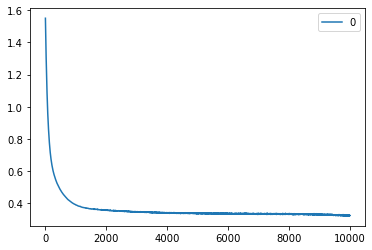

In [61]:
#val_loss = eval_metric(model, history.history, 'loss')
metric = history.history['loss']
val_metric = history.history['val_' + 'loss']

pd.DataFrame(val_metric).plot()

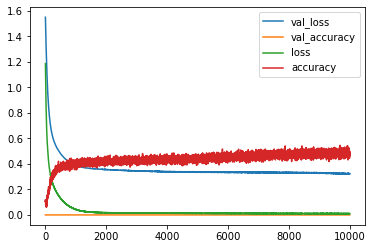

In [55]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()

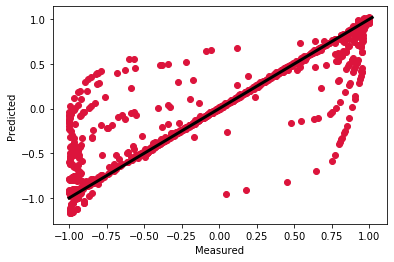

In [56]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

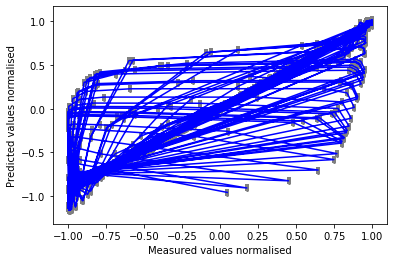

In [57]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [58]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat, scaler), unscale(y_test, scaler)


In [59]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

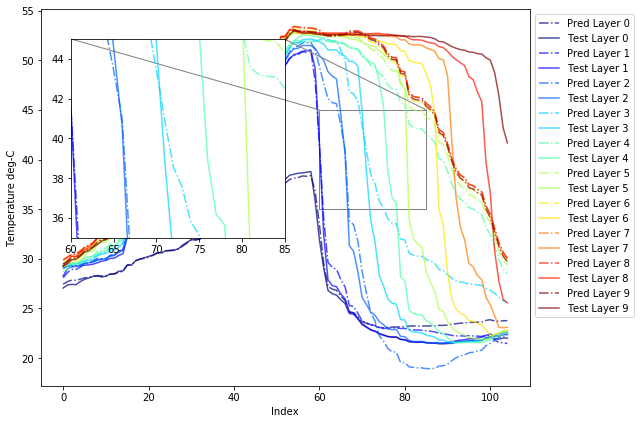

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f51684ef390>)

In [60]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled, y_test_unscaled, alpha =0.7, scm=None)